In [3]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [4]:
df = pd.read_csv('1,2점리뷰.csv')
df.head()

,강의명,학점,강좌유형,패논패여부,이수학년,전공여부,학과,교수명,리뷰,작성시점,평가별점수,공감수,캠퍼스,강의명길이,리뷰길이,리뷰_형태소_tuple,리뷰_형태소_list,리뷰_형태소_only_N,개정형태소
0,기업가정신과창업 KCU,3,이론,x,전학년,교양,교양,김한수,꿀강이라 해서 들었는데 꿀강인지 모를 시험 1번에 퀴즈 두번인데 퀴즈는 어디서 배운...,22년 2학기 수강자,2,0,인문,13,120,"[('꿀강', 'Noun'), ('이라', 'Josa'), ('해서', 'Verb'...","['꿀강', '이라', '해서', '들었는데', '꿀', '강인', '지', '모를...","['꿀강', '꿀', '강인', '시험', '번', '퀴즈', '번', '퀴즈', ...","꿀강, 이라, 해서, 들었는데, 꿀, 강인, 지, 모를, 시험, 1번, 에, 퀴즈,..."
1,기업가정신과창업 KCU,3,이론,x,전학년,교양,교양,김한수,강의가 굉장히 오래된 것 같습니다 내용도 너무 방대하고 퀴즈도 어디서 내는지 모르겠...,22년 2학기 수강자,2,0,인문,13,94,"[('강의', 'Noun'), ('가', 'Josa'), ('굉장히', 'Adjec...","['강의', '가', '굉장히', '오래된', '것', '같습니다', '내용', '...","['강의', '것', '내용', '퀴즈', '꿀', '시간', '제약', '수', ...","강의, 가, 굉장히, 오래된, 것, 같습니다, 내용, 도, 너무, 방대하고, 퀴즈,..."
2,교양골프,2,이론,x,전학년,교양,교양,조원득,일단 학점이 부족해서 교양과목을 찾는다고 하면 이 과목은 최대한 피하는 게 좋다 1...,16년 1학기 수강자,2,1,인문,4,296,"[('일단', 'Noun'), ('학점', 'Noun'), ('이', 'Josa')...","['일단', '학점', '이', '부족해서', '교양과목', '을', '찾는다고',...","['일단', '학점', '교양과목', '이', '과목', '최대한', '피하', '...","일단, 학점, 이, 부족해서, 교양과목, 을, 찾는다고, 하면, 이, 과목, 은, ..."
3,응급처치법,3,이론,x,전학년,교양,교양,함주호,점수 잘 주고 수업 분위기 좋고 내용 재밌고 다 좋은데 교수님이 여학생들한테 불필요...,22년 1학기 수강자,1,5,인문,5,102,"[('점수', 'Noun'), ('잘', 'Verb'), ('주고', 'Verb')...","['점수', '잘', '주고', '수업', '분위기', '좋고', '내용', '재밌...","['점수', '수업', '분위기', '내용', '교수', '여학생', '신체', '...","점수, 잘, 주고, 수업, 분위기, 좋고, 내용, 재밌고, 다, 좋은데, 교수님, ..."
4,응급처치법,3,이론,x,전학년,교양,교양,함주호,저는 교수님이 개인적으로 수업 시간이나 쉬는 시간에 말을 걸어주실 때 되게 기분나쁜...,19년 2학기 수강자,1,1,인문,5,169,"[('저', 'Noun'), ('는', 'Josa'), ('교수', 'Noun'),...","['저', '는', '교수', '님', '이', '개인', '적', '으로', '수...","['저', '교수', '개인', '수업', '시간', '시간', '말', '때', ...","저, 는, 교수님, 이, 개인적, 으로, 수업시간, 이나, 쉬는, 시간, 에, 말,..."


In [5]:
# 3개가 아무것도 없는 경우가 있어서 제거함
df = df[~df['개정형태소'].isnull()]
df = df[['개정형태소']]
df.reset_index(drop=True, inplace=True)
df.head()

,개정형태소
0,"꿀강, 이라, 해서, 들었는데, 꿀, 강인, 지, 모를, 시험, 1번, 에, 퀴즈,..."
1,"강의, 가, 굉장히, 오래된, 것, 같습니다, 내용, 도, 너무, 방대하고, 퀴즈,..."
2,"일단, 학점, 이, 부족해서, 교양과목, 을, 찾는다고, 하면, 이, 과목, 은, ..."
3,"점수, 잘, 주고, 수업, 분위기, 좋고, 내용, 재밌고, 다, 좋은데, 교수님, ..."
4,"저, 는, 교수님, 이, 개인적, 으로, 수업시간, 이나, 쉬는, 시간, 에, 말,..."


In [6]:
dic=pd.read_excel('한국어불용어사전.xlsx')
dic.head()

,word
0,에게
1,가까스로
2,가득
3,가량
4,가령


In [7]:
stopwords = dic['word'].to_list()
stopwords

['에게',
 '가까스로',
 '가득',
 '가량',
 '가령',
 '가면 ',
 '가지',
 '각각',
 '각자',
 '갑자기',
 '같아요',
 '개의치않고',
 '거기',
 '거기다',
 '거니와',
 '거다',
 '거든',
 '거라',
 '거라고',
 '거랑',
 '거바',
 '거야',
 '거였',
 '거의',
 '거임',
 '거죠',
 '건가',
 '걸까',
 '걸려',
 '걸려서',
 '걸로',
 '걸리',
 '걸린',
 '겁나',
 '겁니다',
 '것같다',
 '것과',
 '것들',
 '것을',
 '것이',
 '것인가',
 '것입니다',
 '게나',
 '게다가',
 '겠다',
 '겨우',
 '에서 ',
 '결국',
 '겸사겸사',
 '경우',
 '계시',
 '계신가',
 '고개',
 '고려하면',
 '고로',
 '곳이',
 '곳이다',
 '곳입니다',
 '공기',
 '공동으로',
 '과연',
 '관하여',
 '관한',
 '관해서는',
 '구체적으로',
 '그것',
 '그냥',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런',
 '그런데',
 '그런즉',
 '그럼',
 '그렇지',
 '그리고',
 '그리하여',
 '그만이다',
 '그위에',
 '그저',
 '그중에서',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지도',
 '께서',
 '꽈당',
 '끙끙',
 '끼익',
 '나머지는',
 '나오',
 '남짓',
 '논하지않다',
 '누가알겠는가',
 '다른방면으로',
 '다만',
 '다면',
 '다소',
 '다시',
 '다시말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단연',
 '단지',
 '달려 있다',
 '답게',
 '답글',
 '당분간',
 '당연',
 '당연히',
 '당장',
 '대각선',
 '대략',
 '대로',
 

In [8]:
tokenized_doc = df['개정형태소'].apply(lambda x: x.split(', '))
tokenized_doc

0       [꿀강, 이라, 해서, 들었는데, 꿀, 강인, 지, 모를, 시험, 1번, 에, 퀴즈...
1       [강의, 가, 굉장히, 오래된, 것, 같습니다, 내용, 도, 너무, 방대하고, 퀴즈...
2       [일단, 학점, 이, 부족해서, 교양과목, 을, 찾는다고, 하면, 이, 과목, 은,...
3       [점수, 잘, 주고, 수업, 분위기, 좋고, 내용, 재밌고, 다, 좋은데, 교수님,...
4       [저, 는, 교수님, 이, 개인적, 으로, 수업시간, 이나, 쉬는, 시간, 에, 말...
                              ...                        
5689    [듣지마라, 진짜, 로, 여자, 존나, 좋아하고, 시험, 도, 개, 많음, 존나, ...
5690    [회화, 강사, 그, 이하, 밑, 에, 말, 하는, 게, 모두, 사실, 정말, 영어...
5691    [c, 플, 나왔습니다, 시험, 이, 무슨, 2, 주마, 다, 한번, 있는데, 준비...
5692    [티, 쳐, 2, 그룹, 2, 파트너, 2, 안, 그래도, 다른, 과제, 때문, 에...
5693    [19년, 2학기, 들은, 사람, 으로서, 한마디, 하는데, 시험, 은, 총, 6,...
Name: 개정형태소, Length: 5694, dtype: object

In [9]:
for i in range(len(tokenized_doc)):
    new_tokens = []
    for j in range(len(tokenized_doc[i])):
        if len(tokenized_doc[i][j]) > 1:
            if tokenized_doc[i][j] not in stopwords:
                new_tokens.append(tokenized_doc[i][j])
    tokenized_doc[i] = new_tokens

In [10]:
tokenized_doc

0       [꿀강, 들었는데, 시험, 1번, 퀴즈, 두번, 인데, 퀴즈, 어디서, 배운건, 지...
1       [강의, 오래된, 같습니다, 내용, 방대하고, 퀴즈, 어디서, 내는지, 모르겠고, ...
2       [학점, 부족해서, 교양과목, 찾는다고, 과목, 최대한, 피하, 좋다, 상치, 비용...
3       [점수, 수업, 분위기, 좋고, 내용, 재밌고, 좋은데, 교수님, 여학생, 한테, ...
4       [교수님, 개인적, 수업시간, 쉬는, 걸어주실, 기분, 나쁜, 경험, 많았습니다, ...
                              ...                        
5689    [듣지마라, 여자, 존나, 좋아하고, 시험, 많음, 존나, 열심히, A++, 기분,...
5690    [회화, 강사, 이하, 정말, 영어, 과목, 줄이던지, 제발, 영어, 영어, 회화,...
5691    [나왔습니다, 시험, 주마, 한번, 준비, 가나, 해가나, 점수, 크게, 달라지지,...
5692    [그룹, 파트너, 과제, 바쁜데, 학점, 제일, 바쁨, 교수님, 좋아하는, 한테, ...
5693    [19년, 2학기, 들은, 사람, 하는데, 시험, 2회, 그룹, 2회, 파트너, 1...
Name: 개정형태소, Length: 5694, dtype: object

In [11]:
token_data = []
for i in range(len(tokenized_doc)):
    token_data.append(tokenized_doc[i])

pd.DataFrame(token_data)

,0,1,2,3,4,5,6,7,8,9,...,446,447,448,449,450,451,452,453,454,455
0,꿀강,들었는데,시험,1번,퀴즈,두번,인데,퀴즈,어디서,배운건,...,None,None,None,None,None,None,None,None,None,None
1,강의,오래된,같습니다,내용,방대하고,퀴즈,어디서,내는지,모르겠고,이라고,...,None,None,None,None,None,None,None,None,None,None
2,학점,부족해서,교양과목,찾는다고,과목,최대한,피하,좋다,상치,비용,...,None,None,None,None,None,None,None,None,None,None
3,점수,수업,분위기,좋고,내용,재밌고,좋은데,교수님,여학생,한테,...,None,None,None,None,None,None,None,None,None,None
4,교수님,개인적,수업시간,쉬는,걸어주실,기분,나쁜,경험,많았습니다,인생,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,듣지마라,여자,존나,좋아하고,시험,많음,존나,열심히,A++,기분,...,None,None,None,None,None,None,None,None,None,None
5690,회화,강사,이하,정말,영어,과목,줄이던지,제발,영어,영어,...,None,None,None,None,None,None,None,None,None,None
5691,나왔습니다,시험,주마,한번,준비,가나,해가나,점수,크게,달라지지,...,None,None,None,None,None,None,None,None,None,None
5692,그룹,파트너,과제,바쁜데,학점,제일,바쁨,교수님,좋아하는,한테,...,None,None,None,None,None,None,None,None,None,None


In [12]:
pd.DataFrame(token_data).to_csv('review_tokenized0304_12점.csv', encoding='utf-8-sig', index=False, header=False)

100%|███████████████████████████████████████████████████████████████████████████| 5694/5694 [00:00<00:00, 55430.56it/s]
2023-03-04 17:21:32,647 : INFO : using symmetric alpha at 0.5
2023-03-04 17:21:32,647 : INFO : using symmetric eta at 0.5
2023-03-04 17:21:32,648 : INFO : using serial LDA version on this node
2023-03-04 17:21:32,652 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 5694 documents, updating model once every 2000 documents, evaluating perplexity every 5694 documents, iterating 50x with a convergence threshold of 0.001000
2023-03-04 17:21:32,653 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-03-04 17:21:32,654 : INFO : PROGRESS: pass 0, at document #2000/5694


Number of unique tokens: 2052
Number of documents: 5694


2023-03-04 17:21:34,035 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:21:34,038 : INFO : topic #0 (0.500): 0.007*"제발" + 0.005*"도망가" + 0.005*"평가" + 0.005*"부분" + 0.005*"본인" + 0.004*"모르겠음" + 0.004*"느낌" + 0.004*"출석" + 0.004*"피드백" + 0.004*"ppt"
2023-03-04 17:21:34,040 : INFO : topic #1 (0.500): 0.006*"중간고사" + 0.006*"기말고사" + 0.005*"매주" + 0.005*"듣고" + 0.004*"듣는" + 0.004*"진행" + 0.004*"엄청" + 0.004*"하시는" + 0.004*"레포트" + 0.004*"하지"
2023-03-04 17:21:34,041 : INFO : topic diff=0.822348, rho=1.000000
2023-03-04 17:21:34,042 : INFO : PROGRESS: pass 0, at document #4000/5694
2023-03-04 17:21:35,146 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:21:35,147 : INFO : topic #0 (0.500): 0.006*"제발" + 0.005*"출석" + 0.005*"많고" + 0.004*"교양" + 0.004*"인지" + 0.004*"느낌" + 0.004*"전공" + 0.004*"본인" + 0.004*"모르겠음" + 0.004*"하는데"
2023-03-04 17:21:35,148 : INFO : topic #1 (0.500): 0.006*"중간고사" + 0.006*"기말고사" + 0.005*"매주" + 0.005*"레포트" + 

2023-03-04 17:21:42,384 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1265856 virtual)
2023-03-04 17:21:42,426 : INFO : 58 batches submitted to accumulate stats from 3712 documents (1267591 virtual)
2023-03-04 17:21:42,858 : INFO : 7 accumulators retrieved from output queue
2023-03-04 17:21:42,873 : INFO : accumulated word occurrence stats for 1267591 virtual documents
2023-03-04 17:21:42,971 : INFO : using symmetric alpha at 0.3333333333333333
2023-03-04 17:21:42,972 : INFO : using symmetric eta at 0.3333333333333333
2023-03-04 17:21:42,973 : INFO : using serial LDA version on this node
2023-03-04 17:21:42,975 : INFO : running online (single-pass) LDA training, 3 topics, 1 passes over the supplied corpus of 5694 documents, updating model once every 2000 documents, evaluating perplexity every 5694 documents, iterating 50x with a convergence threshold of 0.001000
2023-03-04 17:21:42,976 : WARNING : too few updates, training might not converge; consider increasin

2023-03-04 17:21:51,635 : INFO : 42 batches submitted to accumulate stats from 2688 documents (932736 virtual)
2023-03-04 17:21:51,710 : INFO : 43 batches submitted to accumulate stats from 2752 documents (954944 virtual)
2023-03-04 17:21:51,782 : INFO : 44 batches submitted to accumulate stats from 2816 documents (977152 virtual)
2023-03-04 17:21:51,799 : INFO : 45 batches submitted to accumulate stats from 2880 documents (999360 virtual)
2023-03-04 17:21:51,857 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1021568 virtual)
2023-03-04 17:21:51,880 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1043776 virtual)
2023-03-04 17:21:51,932 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1065984 virtual)
2023-03-04 17:21:51,946 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1088192 virtual)
2023-03-04 17:21:52,011 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1110400 virtu

2023-03-04 17:22:00,335 : INFO : 15 batches submitted to accumulate stats from 960 documents (333120 virtual)
2023-03-04 17:22:00,443 : INFO : 16 batches submitted to accumulate stats from 1024 documents (355328 virtual)
2023-03-04 17:22:00,511 : INFO : 17 batches submitted to accumulate stats from 1088 documents (377536 virtual)
2023-03-04 17:22:00,622 : INFO : 18 batches submitted to accumulate stats from 1152 documents (399744 virtual)
2023-03-04 17:22:00,674 : INFO : 19 batches submitted to accumulate stats from 1216 documents (421952 virtual)
2023-03-04 17:22:00,688 : INFO : 20 batches submitted to accumulate stats from 1280 documents (444160 virtual)
2023-03-04 17:22:00,801 : INFO : 21 batches submitted to accumulate stats from 1344 documents (466368 virtual)
2023-03-04 17:22:00,819 : INFO : 22 batches submitted to accumulate stats from 1408 documents (488576 virtual)
2023-03-04 17:22:00,842 : INFO : 23 batches submitted to accumulate stats from 1472 documents (510784 virtual)
20

2023-03-04 17:22:05,536 : INFO : topic #1 (0.200): 0.011*"제발" + 0.008*"한자" + 0.007*"이고" + 0.006*"많음" + 0.006*"본인" + 0.005*"도망가" + 0.005*"하시는" + 0.005*"엄청" + 0.005*"그렇게" + 0.005*"평가"
2023-03-04 17:22:05,537 : INFO : topic #2 (0.200): 0.007*"같은" + 0.005*"ppt" + 0.005*"해도" + 0.005*"하는데" + 0.005*"하기" + 0.004*"아니라" + 0.004*"영화" + 0.004*"전공" + 0.004*"비추" + 0.004*"수업내용"
2023-03-04 17:22:05,539 : INFO : topic #3 (0.200): 0.007*"인지" + 0.007*"듣는" + 0.007*"정치" + 0.005*"모르겠음" + 0.005*"느낌" + 0.005*"본인" + 0.005*"부분" + 0.005*"얘기" + 0.005*"채점" + 0.005*"비추"
2023-03-04 17:22:05,540 : INFO : topic #4 (0.200): 0.010*"기말고사" + 0.009*"중간고사" + 0.005*"엄청" + 0.005*"레포트" + 0.005*"보고서" + 0.005*"수업시간" + 0.005*"공지" + 0.005*"출석" + 0.005*"많고" + 0.005*"부분"
2023-03-04 17:22:05,541 : INFO : topic diff=0.529669, rho=0.707107
2023-03-04 17:22:06,366 : INFO : -7.734 per-word bound, 213.0 perplexity estimate based on a held-out corpus of 1694 documents with 20877 words
2023-03-04 17:22:06,367 : INFO : PROGRESS: pass 0, at d

2023-03-04 17:22:12,333 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1221440 virtual)
2023-03-04 17:22:12,400 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1243648 virtual)
2023-03-04 17:22:12,464 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1265856 virtual)
2023-03-04 17:22:12,478 : INFO : 58 batches submitted to accumulate stats from 3712 documents (1288064 virtual)
2023-03-04 17:22:12,494 : INFO : 59 batches submitted to accumulate stats from 3776 documents (1310272 virtual)
2023-03-04 17:22:12,533 : INFO : 60 batches submitted to accumulate stats from 3840 documents (1332480 virtual)
2023-03-04 17:22:12,570 : INFO : 61 batches submitted to accumulate stats from 3904 documents (1354688 virtual)
2023-03-04 17:22:12,608 : INFO : 62 batches submitted to accumulate stats from 3968 documents (1376896 virtual)
2023-03-04 17:22:12,671 : INFO : 63 batches submitted to accumulate stats from 4032 documents (1399104 v

2023-03-04 17:22:20,678 : INFO : 18 batches submitted to accumulate stats from 1152 documents (399744 virtual)
2023-03-04 17:22:20,736 : INFO : 19 batches submitted to accumulate stats from 1216 documents (421952 virtual)
2023-03-04 17:22:20,793 : INFO : 20 batches submitted to accumulate stats from 1280 documents (444160 virtual)
2023-03-04 17:22:20,840 : INFO : 21 batches submitted to accumulate stats from 1344 documents (466368 virtual)
2023-03-04 17:22:20,883 : INFO : 22 batches submitted to accumulate stats from 1408 documents (488576 virtual)
2023-03-04 17:22:20,950 : INFO : 23 batches submitted to accumulate stats from 1472 documents (510784 virtual)
2023-03-04 17:22:20,965 : INFO : 24 batches submitted to accumulate stats from 1536 documents (532992 virtual)
2023-03-04 17:22:21,011 : INFO : 25 batches submitted to accumulate stats from 1600 documents (555200 virtual)
2023-03-04 17:22:21,108 : INFO : 26 batches submitted to accumulate stats from 1664 documents (577408 virtual)
2

2023-03-04 17:22:25,535 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:22:25,538 : INFO : topic #3 (0.143): 0.008*"엄청" + 0.007*"평가" + 0.007*"많고" + 0.007*"좋은" + 0.006*"제발" + 0.006*"듣지마" + 0.006*"듣는" + 0.006*"하는데" + 0.005*"많음" + 0.005*"출석"
2023-03-04 17:22:25,540 : INFO : topic #6 (0.143): 0.008*"모르겠음" + 0.006*"부분" + 0.006*"공지" + 0.005*"관심" + 0.005*"주심" + 0.005*"건지" + 0.005*"한자" + 0.005*"방식" + 0.005*"ppt" + 0.005*"말씀"
2023-03-04 17:22:25,541 : INFO : topic #2 (0.143): 0.009*"질문" + 0.006*"느낌" + 0.006*"전공" + 0.006*"기말고사" + 0.005*"출석" + 0.005*"해도" + 0.005*"레포트" + 0.005*"수업내용" + 0.004*"에는" + 0.004*"하기"
2023-03-04 17:22:25,543 : INFO : topic #5 (0.143): 0.007*"기말고사" + 0.007*"이고" + 0.007*"대면" + 0.007*"중간고사" + 0.006*"인지" + 0.006*"출결" + 0.006*"교양" + 0.005*"듣기" + 0.005*"철학" + 0.005*"매주"
2023-03-04 17:22:25,544 : INFO : topic #4 (0.143): 0.016*"제발" + 0.006*"수업내용" + 0.006*"수업시간" + 0.005*"창업" + 0.005*"대한" + 0.005*"교재" + 0.005*"듣고" + 0.005*"교양" + 0.004*"도망가"

2023-03-04 17:22:32,865 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1177024 virtual)
2023-03-04 17:22:32,906 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1199232 virtual)
2023-03-04 17:22:32,930 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1221440 virtual)
2023-03-04 17:22:32,950 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1243648 virtual)
2023-03-04 17:22:33,112 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1265856 virtual)
2023-03-04 17:22:33,138 : INFO : 58 batches submitted to accumulate stats from 3712 documents (1288064 virtual)
2023-03-04 17:22:33,152 : INFO : 59 batches submitted to accumulate stats from 3776 documents (1310272 virtual)
2023-03-04 17:22:33,173 : INFO : 60 batches submitted to accumulate stats from 3840 documents (1332480 virtual)
2023-03-04 17:22:33,188 : INFO : 61 batches submitted to accumulate stats from 3904 documents (1354688 v

2023-03-04 17:22:49,151 : INFO : 13 batches submitted to accumulate stats from 832 documents (288704 virtual)
2023-03-04 17:22:49,165 : INFO : 14 batches submitted to accumulate stats from 896 documents (310912 virtual)
2023-03-04 17:22:49,270 : INFO : 15 batches submitted to accumulate stats from 960 documents (333120 virtual)
2023-03-04 17:22:49,283 : INFO : 16 batches submitted to accumulate stats from 1024 documents (355328 virtual)
2023-03-04 17:22:49,299 : INFO : 17 batches submitted to accumulate stats from 1088 documents (377536 virtual)
2023-03-04 17:22:49,359 : INFO : 18 batches submitted to accumulate stats from 1152 documents (399744 virtual)
2023-03-04 17:22:49,373 : INFO : 19 batches submitted to accumulate stats from 1216 documents (421952 virtual)
2023-03-04 17:22:49,389 : INFO : 20 batches submitted to accumulate stats from 1280 documents (444160 virtual)
2023-03-04 17:22:49,404 : INFO : 21 batches submitted to accumulate stats from 1344 documents (466368 virtual)
2023

2023-03-04 17:22:53,448 : INFO : topic #4 (0.111): 0.008*"매주" + 0.007*"중간고사" + 0.007*"들으세요" + 0.006*"교재" + 0.006*"ppt" + 0.006*"보고서" + 0.005*"본인" + 0.005*"하세요" + 0.005*"기말고사" + 0.004*"제발"
2023-03-04 17:22:53,450 : INFO : topic #3 (0.111): 0.018*"도망가" + 0.010*"제발" + 0.006*"좋은" + 0.006*"하는데" + 0.006*"전혀" + 0.006*"하기" + 0.005*"방식" + 0.005*"공지" + 0.005*"기말고사" + 0.005*"준비"
2023-03-04 17:22:53,451 : INFO : topic #1 (0.111): 0.009*"재탕" + 0.008*"진행" + 0.008*"개인적" + 0.007*"중간고사" + 0.006*"느낌" + 0.006*"하지" + 0.006*"평가" + 0.005*"기말고사" + 0.005*"듣기" + 0.005*"보고서"
2023-03-04 17:22:53,453 : INFO : topic #0 (0.111): 0.007*"제일" + 0.006*"좋은" + 0.006*"말씀" + 0.006*"질문" + 0.006*"필수" + 0.005*"하는데" + 0.005*"온라인" + 0.005*"수강" + 0.005*"본인" + 0.005*"듣는"
2023-03-04 17:22:53,455 : INFO : topic diff=3.146646, rho=1.000000
2023-03-04 17:22:53,456 : INFO : PROGRESS: pass 0, at document #4000/5694
2023-03-04 17:22:54,311 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:22:54,31

2023-03-04 17:23:08,990 : INFO : 45 batches submitted to accumulate stats from 2880 documents (999360 virtual)
2023-03-04 17:23:09,011 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1021568 virtual)
2023-03-04 17:23:09,023 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1043776 virtual)
2023-03-04 17:23:09,045 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1065984 virtual)
2023-03-04 17:23:09,082 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1088192 virtual)
2023-03-04 17:23:09,251 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1110400 virtual)
2023-03-04 17:23:09,270 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1132608 virtual)
2023-03-04 17:23:09,285 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1154816 virtual)
2023-03-04 17:23:09,303 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1177024 vi

2023-03-04 17:23:25,453 : INFO : 2 batches submitted to accumulate stats from 128 documents (44416 virtual)
2023-03-04 17:23:25,466 : INFO : 3 batches submitted to accumulate stats from 192 documents (66624 virtual)
2023-03-04 17:23:25,479 : INFO : 4 batches submitted to accumulate stats from 256 documents (88832 virtual)
2023-03-04 17:23:25,493 : INFO : 5 batches submitted to accumulate stats from 320 documents (111040 virtual)
2023-03-04 17:23:25,507 : INFO : 6 batches submitted to accumulate stats from 384 documents (133248 virtual)
2023-03-04 17:23:25,525 : INFO : 7 batches submitted to accumulate stats from 448 documents (155456 virtual)
2023-03-04 17:23:25,540 : INFO : 8 batches submitted to accumulate stats from 512 documents (177664 virtual)
2023-03-04 17:23:25,558 : INFO : 9 batches submitted to accumulate stats from 576 documents (199872 virtual)
2023-03-04 17:23:25,573 : INFO : 10 batches submitted to accumulate stats from 640 documents (222080 virtual)
2023-03-04 17:23:25,5

2023-03-04 17:23:28,195 : INFO : 76 batches submitted to accumulate stats from 4864 documents (1687808 virtual)
2023-03-04 17:23:28,224 : INFO : 77 batches submitted to accumulate stats from 4928 documents (1697871 virtual)
2023-03-04 17:23:28,768 : INFO : 7 accumulators retrieved from output queue
2023-03-04 17:23:28,798 : INFO : accumulated word occurrence stats for 1697871 virtual documents
2023-03-04 17:23:29,204 : INFO : using symmetric alpha at 0.09090909090909091
2023-03-04 17:23:29,205 : INFO : using symmetric eta at 0.09090909090909091
2023-03-04 17:23:29,207 : INFO : using serial LDA version on this node
2023-03-04 17:23:29,211 : INFO : running online (single-pass) LDA training, 11 topics, 1 passes over the supplied corpus of 5694 documents, updating model once every 2000 documents, evaluating perplexity every 5694 documents, iterating 50x with a convergence threshold of 0.001000
2023-03-04 17:23:29,212 : WARNING : too few updates, training might not converge; consider increa

2023-03-04 17:23:44,569 : INFO : 32 batches submitted to accumulate stats from 2048 documents (710656 virtual)
2023-03-04 17:23:44,586 : INFO : 33 batches submitted to accumulate stats from 2112 documents (732864 virtual)
2023-03-04 17:23:44,600 : INFO : 34 batches submitted to accumulate stats from 2176 documents (755072 virtual)
2023-03-04 17:23:44,618 : INFO : 35 batches submitted to accumulate stats from 2240 documents (777280 virtual)
2023-03-04 17:23:44,801 : INFO : 36 batches submitted to accumulate stats from 2304 documents (799488 virtual)
2023-03-04 17:23:44,816 : INFO : 37 batches submitted to accumulate stats from 2368 documents (821696 virtual)
2023-03-04 17:23:44,831 : INFO : 38 batches submitted to accumulate stats from 2432 documents (843904 virtual)
2023-03-04 17:23:44,846 : INFO : 39 batches submitted to accumulate stats from 2496 documents (866112 virtual)
2023-03-04 17:23:44,863 : INFO : 40 batches submitted to accumulate stats from 2560 documents (888320 virtual)
2

2023-03-04 17:23:49,158 : INFO : topic diff=0.716726, rho=0.707107
2023-03-04 17:23:49,972 : INFO : -8.151 per-word bound, 284.3 perplexity estimate based on a held-out corpus of 1694 documents with 20877 words
2023-03-04 17:23:49,973 : INFO : PROGRESS: pass 0, at document #5694/5694
2023-03-04 17:23:50,568 : INFO : merging changes from 1694 documents into a model of 5694 documents
2023-03-04 17:23:50,571 : INFO : topic #6 (0.083): 0.009*"하세요" + 0.007*"출석" + 0.007*"해도" + 0.007*"음악" + 0.007*"하시는" + 0.006*"관련" + 0.006*"정치" + 0.006*"얘기" + 0.006*"말씀" + 0.006*"무조건"
2023-03-04 17:23:50,572 : INFO : topic #8 (0.083): 0.033*"족보" + 0.009*"보고서" + 0.008*"교재" + 0.008*"중간고사" + 0.008*"하지" + 0.007*"없으면" + 0.007*"비추" + 0.007*"공학" + 0.007*"학교" + 0.006*"그대로"
2023-03-04 17:23:50,573 : INFO : topic #4 (0.083): 0.017*"실험" + 0.009*"질문" + 0.008*"ppt" + 0.008*"실습" + 0.008*"학년" + 0.007*"수준" + 0.006*"본인" + 0.006*"교재" + 0.005*"한테" + 0.005*"코드"
2023-03-04 17:23:50,575 : INFO : topic #10 (0.083): 0.008*"1학년" + 0.0

2023-03-04 17:24:03,803 : INFO : 62 batches submitted to accumulate stats from 3968 documents (1376896 virtual)
2023-03-04 17:24:03,817 : INFO : 63 batches submitted to accumulate stats from 4032 documents (1399104 virtual)
2023-03-04 17:24:03,967 : INFO : 64 batches submitted to accumulate stats from 4096 documents (1421312 virtual)
2023-03-04 17:24:03,982 : INFO : 65 batches submitted to accumulate stats from 4160 documents (1443520 virtual)
2023-03-04 17:24:04,010 : INFO : 66 batches submitted to accumulate stats from 4224 documents (1465728 virtual)
2023-03-04 17:24:04,068 : INFO : 67 batches submitted to accumulate stats from 4288 documents (1487936 virtual)
2023-03-04 17:24:04,094 : INFO : 68 batches submitted to accumulate stats from 4352 documents (1510144 virtual)
2023-03-04 17:24:04,136 : INFO : 69 batches submitted to accumulate stats from 4416 documents (1532352 virtual)
2023-03-04 17:24:04,150 : INFO : 70 batches submitted to accumulate stats from 4480 documents (1554560 v

2023-03-04 17:24:19,719 : INFO : 17 batches submitted to accumulate stats from 1088 documents (377536 virtual)
2023-03-04 17:24:19,758 : INFO : 18 batches submitted to accumulate stats from 1152 documents (399744 virtual)
2023-03-04 17:24:19,773 : INFO : 19 batches submitted to accumulate stats from 1216 documents (421952 virtual)
2023-03-04 17:24:19,790 : INFO : 20 batches submitted to accumulate stats from 1280 documents (444160 virtual)
2023-03-04 17:24:19,820 : INFO : 21 batches submitted to accumulate stats from 1344 documents (466368 virtual)
2023-03-04 17:24:19,961 : INFO : 22 batches submitted to accumulate stats from 1408 documents (488576 virtual)
2023-03-04 17:24:20,005 : INFO : 23 batches submitted to accumulate stats from 1472 documents (510784 virtual)
2023-03-04 17:24:20,021 : INFO : 24 batches submitted to accumulate stats from 1536 documents (532992 virtual)
2023-03-04 17:24:20,038 : INFO : 25 batches submitted to accumulate stats from 1600 documents (555200 virtual)
2

2023-03-04 17:24:24,384 : INFO : topic #7 (0.071): 0.010*"제발" + 0.008*"필수" + 0.008*"도망가" + 0.008*"많음" + 0.006*"채플" + 0.006*"느낌" + 0.005*"ppt" + 0.005*"부분" + 0.005*"레포트" + 0.005*"수업시간"
2023-03-04 17:24:24,386 : INFO : topic #9 (0.071): 0.012*"부분" + 0.008*"레포트" + 0.007*"모르겠음" + 0.007*"말씀" + 0.007*"범위" + 0.006*"관련" + 0.006*"들으세요" + 0.006*"필수" + 0.006*"모르겠고" + 0.006*"교재"
2023-03-04 17:24:24,387 : INFO : topic #4 (0.071): 0.009*"제발" + 0.006*"공지" + 0.006*"하는데" + 0.006*"엄청" + 0.005*"본인" + 0.005*"자료" + 0.005*"매주" + 0.005*"같은" + 0.005*"기말고사" + 0.005*"대면"
2023-03-04 17:24:24,388 : INFO : topic #1 (0.071): 0.010*"영어" + 0.008*"부분" + 0.007*"하기" + 0.006*"들으세요" + 0.006*"ppt" + 0.006*"중간고사" + 0.006*"재탕" + 0.006*"많고" + 0.006*"하시는" + 0.005*"읽고"
2023-03-04 17:24:24,390 : INFO : topic diff=5.866636, rho=1.000000
2023-03-04 17:24:24,391 : INFO : PROGRESS: pass 0, at document #4000/5694
2023-03-04 17:24:25,219 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:24:25,22

2023-03-04 17:24:40,927 : INFO : 45 batches submitted to accumulate stats from 2880 documents (999360 virtual)
2023-03-04 17:24:40,942 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1021568 virtual)
2023-03-04 17:24:40,983 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1043776 virtual)
2023-03-04 17:24:40,998 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1065984 virtual)
2023-03-04 17:24:41,011 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1088192 virtual)
2023-03-04 17:24:41,201 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1110400 virtual)
2023-03-04 17:24:41,211 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1132608 virtual)
2023-03-04 17:24:41,227 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1154816 virtual)
2023-03-04 17:24:41,252 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1177024 vi

2023-03-04 17:24:46,545 : INFO : topic #3 (0.067): 0.010*"중간고사" + 0.009*"레포트" + 0.009*"프로젝트" + 0.009*"기말고사" + 0.008*"물리" + 0.008*"매주" + 0.008*"되는" + 0.007*"시험지" + 0.007*"수업시간" + 0.007*"들으세요"
2023-03-04 17:24:46,547 : INFO : topic diff=0.669062, rho=0.577350
2023-03-04 17:24:46,552 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2023-03-04 17:24:57,860 : INFO : 1 batches submitted to accumulate stats from 64 documents (22208 virtual)
2023-03-04 17:24:57,872 : INFO : 2 batches submitted to accumulate stats from 128 documents (44416 virtual)
2023-03-04 17:24:57,888 : INFO : 3 batches submitted to accumulate stats from 192 documents (66624 virtual)
2023-03-04 17:24:57,906 : INFO : 4 batches submitted to accumulate stats from 256 documents (88832 virtual)
2023-03-04 17:24:57,923 : INFO : 5 batches submitted to accumulate stats from 320 documents (111040 virtual)
2023-03-04 17:24:57,941 : INFO : 6 batches submitted t

2023-03-04 17:25:00,622 : INFO : 72 batches submitted to accumulate stats from 4608 documents (1598976 virtual)
2023-03-04 17:25:00,636 : INFO : 73 batches submitted to accumulate stats from 4672 documents (1621184 virtual)
2023-03-04 17:25:00,664 : INFO : 74 batches submitted to accumulate stats from 4736 documents (1643392 virtual)
2023-03-04 17:25:00,711 : INFO : 75 batches submitted to accumulate stats from 4800 documents (1665600 virtual)
2023-03-04 17:25:00,725 : INFO : 76 batches submitted to accumulate stats from 4864 documents (1687808 virtual)
2023-03-04 17:25:00,881 : INFO : 77 batches submitted to accumulate stats from 4928 documents (1710016 virtual)
2023-03-04 17:25:00,905 : INFO : 78 batches submitted to accumulate stats from 4992 documents (1732224 virtual)
2023-03-04 17:25:00,942 : INFO : 79 batches submitted to accumulate stats from 5056 documents (1754432 virtual)
2023-03-04 17:25:00,957 : INFO : 80 batches submitted to accumulate stats from 5120 documents (1776640 v

2023-03-04 17:25:17,064 : INFO : 24 batches submitted to accumulate stats from 1536 documents (532992 virtual)
2023-03-04 17:25:17,076 : INFO : 25 batches submitted to accumulate stats from 1600 documents (555200 virtual)
2023-03-04 17:25:17,095 : INFO : 26 batches submitted to accumulate stats from 1664 documents (577408 virtual)
2023-03-04 17:25:17,111 : INFO : 27 batches submitted to accumulate stats from 1728 documents (599616 virtual)
2023-03-04 17:25:17,168 : INFO : 28 batches submitted to accumulate stats from 1792 documents (621824 virtual)
2023-03-04 17:25:17,294 : INFO : 29 batches submitted to accumulate stats from 1856 documents (644032 virtual)
2023-03-04 17:25:17,348 : INFO : 30 batches submitted to accumulate stats from 1920 documents (666240 virtual)
2023-03-04 17:25:17,364 : INFO : 31 batches submitted to accumulate stats from 1984 documents (688448 virtual)
2023-03-04 17:25:17,398 : INFO : 32 batches submitted to accumulate stats from 2048 documents (710656 virtual)
2

2023-03-04 17:25:21,606 : INFO : topic #5 (0.059): 0.044*"제발" + 0.037*"도망가" + 0.009*"마다" + 0.008*"공지" + 0.008*"자료" + 0.007*"제대로" + 0.007*"한학기" + 0.007*"범위" + 0.006*"처음" + 0.005*"같은"
2023-03-04 17:25:21,607 : INFO : topic diff=8.041944, rho=1.000000
2023-03-04 17:25:21,609 : INFO : PROGRESS: pass 0, at document #4000/5694
2023-03-04 17:25:22,448 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:25:22,452 : INFO : topic #12 (0.059): 0.011*"엑셀" + 0.008*"ppt" + 0.008*"처음" + 0.007*"하기" + 0.007*"사업" + 0.007*"많아서" + 0.007*"대한" + 0.007*"하지" + 0.007*"포기" + 0.006*"해도"
2023-03-04 17:25:22,453 : INFO : topic #4 (0.059): 0.010*"교양" + 0.009*"많고" + 0.008*"영화" + 0.007*"듣고" + 0.007*"사람들" + 0.006*"ppt" + 0.006*"출석" + 0.005*"실습" + 0.005*"하는지" + 0.005*"출결"
2023-03-04 17:25:22,455 : INFO : topic #0 (0.059): 0.013*"창업" + 0.012*"많고" + 0.009*"부분" + 0.008*"느낌" + 0.008*"영화" + 0.007*"얘기" + 0.007*"철학" + 0.006*"역사" + 0.006*"채점" + 0.006*"영어"
2023-03-04 17:25:22,457 : INFO : t

2023-03-04 17:25:37,146 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1110400 virtual)
2023-03-04 17:25:37,169 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1132608 virtual)
2023-03-04 17:25:37,182 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1154816 virtual)
2023-03-04 17:25:37,198 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1177024 virtual)
2023-03-04 17:25:37,212 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1199232 virtual)
2023-03-04 17:25:37,251 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1221440 virtual)
2023-03-04 17:25:37,307 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1243648 virtual)
2023-03-04 17:25:37,406 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1265856 virtual)
2023-03-04 17:25:37,440 : INFO : 58 batches submitted to accumulate stats from 3712 documents (1288064 v

2023-03-04 17:25:53,978 : INFO : 2 batches submitted to accumulate stats from 128 documents (44416 virtual)
2023-03-04 17:25:53,992 : INFO : 3 batches submitted to accumulate stats from 192 documents (66624 virtual)
2023-03-04 17:25:54,005 : INFO : 4 batches submitted to accumulate stats from 256 documents (88832 virtual)
2023-03-04 17:25:54,021 : INFO : 5 batches submitted to accumulate stats from 320 documents (111040 virtual)
2023-03-04 17:25:54,037 : INFO : 6 batches submitted to accumulate stats from 384 documents (133248 virtual)
2023-03-04 17:25:54,052 : INFO : 7 batches submitted to accumulate stats from 448 documents (155456 virtual)
2023-03-04 17:25:54,067 : INFO : 8 batches submitted to accumulate stats from 512 documents (177664 virtual)
2023-03-04 17:25:54,082 : INFO : 9 batches submitted to accumulate stats from 576 documents (199872 virtual)
2023-03-04 17:25:54,096 : INFO : 10 batches submitted to accumulate stats from 640 documents (222080 virtual)
2023-03-04 17:25:54,1

2023-03-04 17:25:56,874 : INFO : 76 batches submitted to accumulate stats from 4864 documents (1687808 virtual)
2023-03-04 17:25:57,001 : INFO : 77 batches submitted to accumulate stats from 4928 documents (1710016 virtual)
2023-03-04 17:25:57,057 : INFO : 78 batches submitted to accumulate stats from 4992 documents (1732224 virtual)
2023-03-04 17:25:57,102 : INFO : 79 batches submitted to accumulate stats from 5056 documents (1754432 virtual)
2023-03-04 17:25:57,130 : INFO : 80 batches submitted to accumulate stats from 5120 documents (1776640 virtual)
2023-03-04 17:25:57,146 : INFO : 81 batches submitted to accumulate stats from 5184 documents (1798848 virtual)
2023-03-04 17:25:57,194 : INFO : 82 batches submitted to accumulate stats from 5248 documents (1805094 virtual)
2023-03-04 17:25:57,727 : INFO : 7 accumulators retrieved from output queue
2023-03-04 17:25:57,798 : INFO : accumulated word occurrence stats for 1805094 virtual documents
2023-03-04 17:25:58,459 : INFO : using symm

2023-03-04 17:26:13,585 : INFO : 27 batches submitted to accumulate stats from 1728 documents (599616 virtual)
2023-03-04 17:26:13,657 : INFO : 28 batches submitted to accumulate stats from 1792 documents (621824 virtual)
2023-03-04 17:26:13,802 : INFO : 29 batches submitted to accumulate stats from 1856 documents (644032 virtual)
2023-03-04 17:26:13,842 : INFO : 30 batches submitted to accumulate stats from 1920 documents (666240 virtual)
2023-03-04 17:26:13,855 : INFO : 31 batches submitted to accumulate stats from 1984 documents (688448 virtual)
2023-03-04 17:26:13,881 : INFO : 32 batches submitted to accumulate stats from 2048 documents (710656 virtual)
2023-03-04 17:26:13,896 : INFO : 33 batches submitted to accumulate stats from 2112 documents (732864 virtual)
2023-03-04 17:26:13,911 : INFO : 34 batches submitted to accumulate stats from 2176 documents (755072 virtual)
2023-03-04 17:26:13,949 : INFO : 35 batches submitted to accumulate stats from 2240 documents (777280 virtual)
2

2023-03-04 17:26:18,280 : INFO : PROGRESS: pass 0, at document #4000/5694
2023-03-04 17:26:19,131 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:26:19,137 : INFO : topic #17 (0.050): 0.016*"제발" + 0.014*"도망가" + 0.010*"이고" + 0.007*"레포트" + 0.007*"해도" + 0.007*"보면" + 0.007*"도망가세요" + 0.006*"듣고" + 0.006*"머리" + 0.006*"설계"
2023-03-04 17:26:19,138 : INFO : topic #19 (0.050): 0.017*"중간고사" + 0.013*"조교" + 0.012*"기말고사" + 0.010*"학년" + 0.010*"레포트" + 0.007*"매주" + 0.007*"출석" + 0.007*"두번" + 0.007*"실습" + 0.006*"많고"
2023-03-04 17:26:19,140 : INFO : topic #18 (0.050): 0.013*"하시는" + 0.010*"말씀" + 0.009*"정치" + 0.009*"교양" + 0.008*"없이" + 0.007*"ppt" + 0.007*"느낌" + 0.007*"상담" + 0.006*"같은" + 0.006*"중국"
2023-03-04 17:26:19,142 : INFO : topic #8 (0.050): 0.012*"질문" + 0.009*"많음" + 0.008*"미리" + 0.007*"대한" + 0.007*"하시고" + 0.007*"한학기" + 0.006*"배우는" + 0.006*"많고" + 0.006*"엄청" + 0.006*"않음"
2023-03-04 17:26:19,145 : INFO : topic #0 (0.050): 0.013*"공지" + 0.008*"많고" + 0.007*"보고서" + 0

2023-03-04 17:26:34,455 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1154816 virtual)
2023-03-04 17:26:34,490 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1177024 virtual)
2023-03-04 17:26:34,506 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1199232 virtual)
2023-03-04 17:26:34,565 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1221440 virtual)
2023-03-04 17:26:34,597 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1243648 virtual)
2023-03-04 17:26:34,641 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1265856 virtual)
2023-03-04 17:26:34,710 : INFO : 58 batches submitted to accumulate stats from 3712 documents (1288064 virtual)
2023-03-04 17:26:34,752 : INFO : 59 batches submitted to accumulate stats from 3776 documents (1310272 virtual)
2023-03-04 17:26:34,776 : INFO : 60 batches submitted to accumulate stats from 3840 documents (1332480 v

2023-03-04 17:26:51,476 : INFO : 2 batches submitted to accumulate stats from 128 documents (44416 virtual)
2023-03-04 17:26:51,483 : INFO : 3 batches submitted to accumulate stats from 192 documents (66624 virtual)
2023-03-04 17:26:51,497 : INFO : 4 batches submitted to accumulate stats from 256 documents (88832 virtual)
2023-03-04 17:26:51,508 : INFO : 5 batches submitted to accumulate stats from 320 documents (111040 virtual)
2023-03-04 17:26:51,524 : INFO : 6 batches submitted to accumulate stats from 384 documents (133248 virtual)
2023-03-04 17:26:51,541 : INFO : 7 batches submitted to accumulate stats from 448 documents (155456 virtual)
2023-03-04 17:26:51,555 : INFO : 8 batches submitted to accumulate stats from 512 documents (177664 virtual)
2023-03-04 17:26:51,570 : INFO : 9 batches submitted to accumulate stats from 576 documents (199872 virtual)
2023-03-04 17:26:51,590 : INFO : 10 batches submitted to accumulate stats from 640 documents (222080 virtual)
2023-03-04 17:26:51,6

2023-03-04 17:26:54,522 : INFO : 76 batches submitted to accumulate stats from 4864 documents (1687808 virtual)
2023-03-04 17:26:54,561 : INFO : 77 batches submitted to accumulate stats from 4928 documents (1710016 virtual)
2023-03-04 17:26:54,699 : INFO : 78 batches submitted to accumulate stats from 4992 documents (1732224 virtual)
2023-03-04 17:26:54,752 : INFO : 79 batches submitted to accumulate stats from 5056 documents (1754432 virtual)
2023-03-04 17:26:54,778 : INFO : 80 batches submitted to accumulate stats from 5120 documents (1776640 virtual)
2023-03-04 17:26:54,818 : INFO : 81 batches submitted to accumulate stats from 5184 documents (1798848 virtual)
2023-03-04 17:26:54,845 : INFO : 82 batches submitted to accumulate stats from 5248 documents (1821056 virtual)
2023-03-04 17:26:54,864 : INFO : 83 batches submitted to accumulate stats from 5312 documents (1832854 virtual)
2023-03-04 17:26:55,416 : INFO : 7 accumulators retrieved from output queue
2023-03-04 17:26:55,499 : IN

2023-03-04 17:27:11,719 : INFO : 26 batches submitted to accumulate stats from 1664 documents (577408 virtual)
2023-03-04 17:27:11,735 : INFO : 27 batches submitted to accumulate stats from 1728 documents (599616 virtual)
2023-03-04 17:27:11,789 : INFO : 28 batches submitted to accumulate stats from 1792 documents (621824 virtual)
2023-03-04 17:27:12,021 : INFO : 29 batches submitted to accumulate stats from 1856 documents (644032 virtual)
2023-03-04 17:27:12,036 : INFO : 30 batches submitted to accumulate stats from 1920 documents (666240 virtual)
2023-03-04 17:27:12,049 : INFO : 31 batches submitted to accumulate stats from 1984 documents (688448 virtual)
2023-03-04 17:27:12,065 : INFO : 32 batches submitted to accumulate stats from 2048 documents (710656 virtual)
2023-03-04 17:27:12,081 : INFO : 33 batches submitted to accumulate stats from 2112 documents (732864 virtual)
2023-03-04 17:27:12,095 : INFO : 34 batches submitted to accumulate stats from 2176 documents (755072 virtual)
2

2023-03-04 17:27:17,035 : INFO : topic #7 (0.043): 0.008*"평가" + 0.007*"족보" + 0.007*"레포트" + 0.007*"방식" + 0.007*"매주" + 0.006*"이고" + 0.006*"많고" + 0.006*"영어" + 0.006*"ppt" + 0.005*"제출"
2023-03-04 17:27:17,036 : INFO : topic diff=12.277714, rho=1.000000
2023-03-04 17:27:17,038 : INFO : PROGRESS: pass 0, at document #4000/5694
2023-03-04 17:27:17,938 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:27:17,943 : INFO : topic #19 (0.043): 0.022*"평가" + 0.011*"인지" + 0.008*"정치" + 0.008*"하기" + 0.007*"소통" + 0.006*"같은" + 0.006*"발언" + 0.006*"이었음" + 0.006*"전혀" + 0.006*"지루한"
2023-03-04 17:27:17,944 : INFO : topic #22 (0.043): 0.014*"말씀" + 0.012*"공지" + 0.011*"듣기" + 0.009*"들어도" + 0.009*"처음" + 0.009*"통계학" + 0.007*"인강" + 0.006*"지식" + 0.006*"많고" + 0.006*"배운"
2023-03-04 17:27:17,946 : INFO : topic #0 (0.043): 0.012*"일본어" + 0.012*"레포트" + 0.011*"사람들" + 0.010*"제발" + 0.010*"수강신청" + 0.009*"신청" + 0.009*"연강" + 0.008*"이다" + 0.008*"듣지마" + 0.007*"고사"
2023-03-04 17:27:17,947 : IN

2023-03-04 17:27:32,387 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1110400 virtual)
2023-03-04 17:27:32,440 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1132608 virtual)
2023-03-04 17:27:32,469 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1154816 virtual)
2023-03-04 17:27:32,492 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1177024 virtual)
2023-03-04 17:27:32,505 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1199232 virtual)
2023-03-04 17:27:32,534 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1221440 virtual)
2023-03-04 17:27:32,645 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1243648 virtual)
2023-03-04 17:27:32,691 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1265856 virtual)
2023-03-04 17:27:32,733 : INFO : 58 batches submitted to accumulate stats from 3712 documents (1288064 v

2023-03-04 17:27:38,278 : INFO : topic diff=0.811882, rho=0.577350
2023-03-04 17:27:38,284 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2023-03-04 17:27:49,220 : INFO : 1 batches submitted to accumulate stats from 64 documents (22208 virtual)
2023-03-04 17:27:49,231 : INFO : 2 batches submitted to accumulate stats from 128 documents (44416 virtual)
2023-03-04 17:27:49,240 : INFO : 3 batches submitted to accumulate stats from 192 documents (66624 virtual)
2023-03-04 17:27:49,247 : INFO : 4 batches submitted to accumulate stats from 256 documents (88832 virtual)
2023-03-04 17:27:49,263 : INFO : 5 batches submitted to accumulate stats from 320 documents (111040 virtual)
2023-03-04 17:27:49,276 : INFO : 6 batches submitted to accumulate stats from 384 documents (133248 virtual)
2023-03-04 17:27:49,292 : INFO : 7 batches submitted to accumulate stats from 448 documents (155456 virtual)
2023-03-04 17:27:49,307 : I

2023-03-04 17:27:52,162 : INFO : 73 batches submitted to accumulate stats from 4672 documents (1621184 virtual)
2023-03-04 17:27:52,181 : INFO : 74 batches submitted to accumulate stats from 4736 documents (1643392 virtual)
2023-03-04 17:27:52,214 : INFO : 75 batches submitted to accumulate stats from 4800 documents (1665600 virtual)
2023-03-04 17:27:52,249 : INFO : 76 batches submitted to accumulate stats from 4864 documents (1687808 virtual)
2023-03-04 17:27:52,323 : INFO : 77 batches submitted to accumulate stats from 4928 documents (1710016 virtual)
2023-03-04 17:27:52,401 : INFO : 78 batches submitted to accumulate stats from 4992 documents (1732224 virtual)
2023-03-04 17:27:52,455 : INFO : 79 batches submitted to accumulate stats from 5056 documents (1754432 virtual)
2023-03-04 17:27:52,532 : INFO : 80 batches submitted to accumulate stats from 5120 documents (1776640 virtual)
2023-03-04 17:27:52,547 : INFO : 81 batches submitted to accumulate stats from 5184 documents (1798848 v

2023-03-04 17:28:09,097 : INFO : 22 batches submitted to accumulate stats from 1408 documents (488576 virtual)
2023-03-04 17:28:09,146 : INFO : 23 batches submitted to accumulate stats from 1472 documents (510784 virtual)
2023-03-04 17:28:09,157 : INFO : 24 batches submitted to accumulate stats from 1536 documents (532992 virtual)
2023-03-04 17:28:09,172 : INFO : 25 batches submitted to accumulate stats from 1600 documents (555200 virtual)
2023-03-04 17:28:09,186 : INFO : 26 batches submitted to accumulate stats from 1664 documents (577408 virtual)
2023-03-04 17:28:09,201 : INFO : 27 batches submitted to accumulate stats from 1728 documents (599616 virtual)
2023-03-04 17:28:09,216 : INFO : 28 batches submitted to accumulate stats from 1792 documents (621824 virtual)
2023-03-04 17:28:09,422 : INFO : 29 batches submitted to accumulate stats from 1856 documents (644032 virtual)
2023-03-04 17:28:09,452 : INFO : 30 batches submitted to accumulate stats from 1920 documents (666240 virtual)
2

2023-03-04 17:28:14,574 : INFO : topic #11 (0.038): 0.012*"본인" + 0.009*"제발" + 0.008*"질문" + 0.007*"대면" + 0.007*"에는" + 0.007*"같은" + 0.006*"듣지마" + 0.006*"영상" + 0.006*"전공" + 0.005*"하는데"
2023-03-04 17:28:14,575 : INFO : topic #14 (0.038): 0.049*"제발" + 0.038*"도망가" + 0.008*"중간고사" + 0.007*"보고서" + 0.006*"부분" + 0.006*"수업시간" + 0.006*"들었는데" + 0.006*"비추" + 0.006*"이고" + 0.006*"하는데"
2023-03-04 17:28:14,577 : INFO : topic #17 (0.038): 0.008*"하는데" + 0.008*"듣기" + 0.008*"진행" + 0.007*"진도" + 0.007*"수준" + 0.005*"지식" + 0.005*"하지" + 0.005*"많고" + 0.005*"방식" + 0.005*"수업시간"
2023-03-04 17:28:14,579 : INFO : topic #2 (0.038): 0.008*"듣고" + 0.008*"공지" + 0.008*"하셔서" + 0.006*"채점" + 0.006*"집중" + 0.005*"관심" + 0.005*"느낌" + 0.005*"많음" + 0.005*"한번" + 0.005*"하시고"
2023-03-04 17:28:14,581 : INFO : topic diff=14.517817, rho=1.000000
2023-03-04 17:28:14,583 : INFO : PROGRESS: pass 0, at document #4000/5694
2023-03-04 17:28:15,335 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:28:15,341

2023-03-04 17:28:29,569 : INFO : 45 batches submitted to accumulate stats from 2880 documents (999360 virtual)
2023-03-04 17:28:29,593 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1021568 virtual)
2023-03-04 17:28:29,608 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1043776 virtual)
2023-03-04 17:28:29,630 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1065984 virtual)
2023-03-04 17:28:29,726 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1088192 virtual)
2023-03-04 17:28:29,853 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1110400 virtual)
2023-03-04 17:28:29,882 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1132608 virtual)
2023-03-04 17:28:29,915 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1154816 virtual)
2023-03-04 17:28:29,935 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1177024 vi

2023-03-04 17:28:36,811 : INFO : topic #16 (0.037): 0.016*"자료" + 0.014*"수업내용" + 0.010*"개인적" + 0.010*"얻어" + 0.009*"부분" + 0.009*"중간고사" + 0.008*"범위" + 0.007*"싸강" + 0.007*"스타일" + 0.007*"온라인"
2023-03-04 17:28:36,812 : INFO : topic #23 (0.037): 0.021*"보고서" + 0.009*"관련" + 0.009*"모르겠음" + 0.009*"이다" + 0.009*"느낌" + 0.008*"개인적" + 0.007*"교양" + 0.007*"하시는" + 0.007*"종강" + 0.007*"듣고"
2023-03-04 17:28:36,813 : INFO : topic #4 (0.037): 0.020*"대면" + 0.014*"인강" + 0.013*"기말고사" + 0.011*"해도" + 0.009*"목소리" + 0.008*"아무리" + 0.008*"수준" + 0.008*"프로그램" + 0.008*"난이도" + 0.007*"중간고사"
2023-03-04 17:28:36,814 : INFO : topic diff=0.778629, rho=0.577350
2023-03-04 17:28:36,824 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2023-03-04 17:28:47,971 : INFO : 1 batches submitted to accumulate stats from 64 documents (22208 virtual)
2023-03-04 17:28:47,976 : INFO : 2 batches submitted to accumulate stats from 128 documents (44416 virtual)
2023-03-04

2023-03-04 17:28:50,836 : INFO : 68 batches submitted to accumulate stats from 4352 documents (1510144 virtual)
2023-03-04 17:28:50,867 : INFO : 69 batches submitted to accumulate stats from 4416 documents (1532352 virtual)
2023-03-04 17:28:50,913 : INFO : 70 batches submitted to accumulate stats from 4480 documents (1554560 virtual)
2023-03-04 17:28:50,974 : INFO : 71 batches submitted to accumulate stats from 4544 documents (1576768 virtual)
2023-03-04 17:28:51,107 : INFO : 72 batches submitted to accumulate stats from 4608 documents (1598976 virtual)
2023-03-04 17:28:51,122 : INFO : 73 batches submitted to accumulate stats from 4672 documents (1621184 virtual)
2023-03-04 17:28:51,160 : INFO : 74 batches submitted to accumulate stats from 4736 documents (1643392 virtual)
2023-03-04 17:28:51,181 : INFO : 75 batches submitted to accumulate stats from 4800 documents (1665600 virtual)
2023-03-04 17:28:51,197 : INFO : 76 batches submitted to accumulate stats from 4864 documents (1687808 v

2023-03-04 17:29:07,972 : INFO : 16 batches submitted to accumulate stats from 1024 documents (355328 virtual)
2023-03-04 17:29:08,003 : INFO : 17 batches submitted to accumulate stats from 1088 documents (377536 virtual)
2023-03-04 17:29:08,034 : INFO : 18 batches submitted to accumulate stats from 1152 documents (399744 virtual)
2023-03-04 17:29:08,049 : INFO : 19 batches submitted to accumulate stats from 1216 documents (421952 virtual)
2023-03-04 17:29:08,069 : INFO : 20 batches submitted to accumulate stats from 1280 documents (444160 virtual)
2023-03-04 17:29:08,083 : INFO : 21 batches submitted to accumulate stats from 1344 documents (466368 virtual)
2023-03-04 17:29:08,274 : INFO : 22 batches submitted to accumulate stats from 1408 documents (488576 virtual)
2023-03-04 17:29:08,312 : INFO : 23 batches submitted to accumulate stats from 1472 documents (510784 virtual)
2023-03-04 17:29:08,329 : INFO : 24 batches submitted to accumulate stats from 1536 documents (532992 virtual)
2

2023-03-04 17:29:13,161 : INFO : running online (single-pass) LDA training, 29 topics, 1 passes over the supplied corpus of 5694 documents, updating model once every 2000 documents, evaluating perplexity every 5694 documents, iterating 50x with a convergence threshold of 0.001000
2023-03-04 17:29:13,163 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-03-04 17:29:13,164 : INFO : PROGRESS: pass 0, at document #2000/5694
2023-03-04 17:29:14,033 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:29:14,036 : INFO : topic #18 (0.034): 0.011*"듣고" + 0.009*"많음" + 0.009*"보고서" + 0.007*"본인" + 0.007*"사용" + 0.006*"교재" + 0.006*"인지" + 0.005*"중간고사" + 0.005*"마다" + 0.005*"처음"
2023-03-04 17:29:14,037 : INFO : topic #20 (0.034): 0.011*"좋은" + 0.008*"듣고" + 0.007*"많고" + 0.006*"듣지마" + 0.006*"기말고사" + 0.006*"부분" + 0.006*"중간고사" + 0.005*"없어서" + 0.005*"대한" + 0.005*"매주"
2023-03-04 17:29:14

2023-03-04 17:29:28,589 : INFO : 38 batches submitted to accumulate stats from 2432 documents (843904 virtual)
2023-03-04 17:29:28,613 : INFO : 39 batches submitted to accumulate stats from 2496 documents (866112 virtual)
2023-03-04 17:29:28,627 : INFO : 40 batches submitted to accumulate stats from 2560 documents (888320 virtual)
2023-03-04 17:29:28,643 : INFO : 41 batches submitted to accumulate stats from 2624 documents (910528 virtual)
2023-03-04 17:29:28,658 : INFO : 42 batches submitted to accumulate stats from 2688 documents (932736 virtual)
2023-03-04 17:29:28,804 : INFO : 43 batches submitted to accumulate stats from 2752 documents (954944 virtual)
2023-03-04 17:29:28,887 : INFO : 44 batches submitted to accumulate stats from 2816 documents (977152 virtual)
2023-03-04 17:29:28,909 : INFO : 45 batches submitted to accumulate stats from 2880 documents (999360 virtual)
2023-03-04 17:29:28,923 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1021568 virtual)


2023-03-04 17:29:34,504 : INFO : topic #22 (0.033): 0.013*"하는데" + 0.011*"실습" + 0.010*"그대로" + 0.010*"학년" + 0.010*"수준" + 0.009*"제대로" + 0.009*"솔직히" + 0.009*"강사" + 0.009*"노답" + 0.008*"들어"
2023-03-04 17:29:34,507 : INFO : topic diff=0.822817, rho=0.707107
2023-03-04 17:29:35,199 : INFO : -8.799 per-word bound, 445.6 perplexity estimate based on a held-out corpus of 1694 documents with 20877 words
2023-03-04 17:29:35,200 : INFO : PROGRESS: pass 0, at document #5694/5694
2023-03-04 17:29:35,694 : INFO : merging changes from 1694 documents into a model of 5694 documents
2023-03-04 17:29:35,700 : INFO : topic #18 (0.033): 0.011*"이다" + 0.011*"코드" + 0.010*"교양" + 0.008*"몰라도" + 0.007*"이고" + 0.007*"반복" + 0.007*"마지막" + 0.007*"처음" + 0.007*"계속" + 0.006*"그렇게"
2023-03-04 17:29:35,701 : INFO : topic #9 (0.033): 0.014*"컴공" + 0.013*"실력" + 0.012*"기초" + 0.011*"보면" + 0.010*"듣다" + 0.010*"대학" + 0.010*"기본" + 0.009*"준비" + 0.007*"학교" + 0.007*"굳이"
2023-03-04 17:29:35,703 : INFO : topic #3 (0.033): 0.036*"설계" + 0.012

2023-03-04 17:29:49,572 : INFO : 60 batches submitted to accumulate stats from 3840 documents (1332480 virtual)
2023-03-04 17:29:49,585 : INFO : 61 batches submitted to accumulate stats from 3904 documents (1354688 virtual)
2023-03-04 17:29:49,676 : INFO : 62 batches submitted to accumulate stats from 3968 documents (1376896 virtual)
2023-03-04 17:29:49,745 : INFO : 63 batches submitted to accumulate stats from 4032 documents (1399104 virtual)
2023-03-04 17:29:49,760 : INFO : 64 batches submitted to accumulate stats from 4096 documents (1421312 virtual)
2023-03-04 17:29:49,877 : INFO : 65 batches submitted to accumulate stats from 4160 documents (1443520 virtual)
2023-03-04 17:29:49,890 : INFO : 66 batches submitted to accumulate stats from 4224 documents (1465728 virtual)
2023-03-04 17:29:49,905 : INFO : 67 batches submitted to accumulate stats from 4288 documents (1487936 virtual)
2023-03-04 17:29:49,956 : INFO : 68 batches submitted to accumulate stats from 4352 documents (1510144 v

2023-03-04 17:30:07,106 : INFO : 8 batches submitted to accumulate stats from 512 documents (177664 virtual)
2023-03-04 17:30:07,125 : INFO : 9 batches submitted to accumulate stats from 576 documents (199872 virtual)
2023-03-04 17:30:07,141 : INFO : 10 batches submitted to accumulate stats from 640 documents (222080 virtual)
2023-03-04 17:30:07,154 : INFO : 11 batches submitted to accumulate stats from 704 documents (244288 virtual)
2023-03-04 17:30:07,169 : INFO : 12 batches submitted to accumulate stats from 768 documents (266496 virtual)
2023-03-04 17:30:07,182 : INFO : 13 batches submitted to accumulate stats from 832 documents (288704 virtual)
2023-03-04 17:30:07,214 : INFO : 14 batches submitted to accumulate stats from 896 documents (310912 virtual)
2023-03-04 17:30:07,372 : INFO : 15 batches submitted to accumulate stats from 960 documents (333120 virtual)
2023-03-04 17:30:07,388 : INFO : 16 batches submitted to accumulate stats from 1024 documents (355328 virtual)
2023-03-04 

2023-03-04 17:30:10,640 : INFO : 82 batches submitted to accumulate stats from 5248 documents (1821056 virtual)
2023-03-04 17:30:10,690 : INFO : 83 batches submitted to accumulate stats from 5312 documents (1843264 virtual)
2023-03-04 17:30:10,734 : INFO : 84 batches submitted to accumulate stats from 5376 documents (1865472 virtual)
2023-03-04 17:30:10,845 : INFO : 85 batches submitted to accumulate stats from 5440 documents (1879699 virtual)
2023-03-04 17:30:11,421 : INFO : 7 accumulators retrieved from output queue
2023-03-04 17:30:11,556 : INFO : accumulated word occurrence stats for 1879699 virtual documents
2023-03-04 17:30:12,931 : INFO : using symmetric alpha at 0.03125
2023-03-04 17:30:12,931 : INFO : using symmetric eta at 0.03125
2023-03-04 17:30:12,932 : INFO : using serial LDA version on this node
2023-03-04 17:30:12,944 : INFO : running online (single-pass) LDA training, 32 topics, 1 passes over the supplied corpus of 5694 documents, updating model once every 2000 documen

2023-03-04 17:30:28,236 : INFO : 30 batches submitted to accumulate stats from 1920 documents (666240 virtual)
2023-03-04 17:30:28,251 : INFO : 31 batches submitted to accumulate stats from 1984 documents (688448 virtual)
2023-03-04 17:30:28,285 : INFO : 32 batches submitted to accumulate stats from 2048 documents (710656 virtual)
2023-03-04 17:30:28,299 : INFO : 33 batches submitted to accumulate stats from 2112 documents (732864 virtual)
2023-03-04 17:30:28,314 : INFO : 34 batches submitted to accumulate stats from 2176 documents (755072 virtual)
2023-03-04 17:30:28,329 : INFO : 35 batches submitted to accumulate stats from 2240 documents (777280 virtual)
2023-03-04 17:30:28,451 : INFO : 36 batches submitted to accumulate stats from 2304 documents (799488 virtual)
2023-03-04 17:30:28,508 : INFO : 37 batches submitted to accumulate stats from 2368 documents (821696 virtual)
2023-03-04 17:30:28,560 : INFO : 38 batches submitted to accumulate stats from 2432 documents (843904 virtual)
2

2023-03-04 17:30:34,800 : INFO : PROGRESS: pass 0, at document #4000/5694
2023-03-04 17:30:35,507 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:30:35,512 : INFO : topic #7 (0.030): 0.013*"하세요" + 0.010*"좋으신" + 0.009*"나오는" + 0.008*"들어" + 0.008*"그래프" + 0.008*"ppt" + 0.008*"사과" + 0.007*"주제" + 0.007*"깐깐하고" + 0.007*"에도"
2023-03-04 17:30:35,513 : INFO : topic #31 (0.030): 0.025*"정치" + 0.012*"교재" + 0.008*"방식" + 0.008*"부분" + 0.008*"말씀" + 0.007*"대면" + 0.007*"였던" + 0.007*"않음" + 0.007*"제대로" + 0.007*"출석"
2023-03-04 17:30:35,514 : INFO : topic #8 (0.030): 0.011*"본인" + 0.008*"에는" + 0.008*"기말시험" + 0.008*"내내" + 0.007*"수도" + 0.007*"건지" + 0.007*"질문" + 0.007*"마다" + 0.007*"수업시간" + 0.006*"한자"
2023-03-04 17:30:35,515 : INFO : topic #2 (0.030): 0.036*"한자" + 0.008*"인지" + 0.008*"출석" + 0.008*"같은" + 0.008*"부분" + 0.008*"힘들었음" + 0.007*"마이크" + 0.007*"기말고사" + 0.007*"중간고사" + 0.007*"보면"
2023-03-04 17:30:35,516 : INFO : topic #15 (0.030): 0.014*"이고" + 0.013*"많고" + 0.013*"상담" +

2023-03-04 17:30:50,226 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1154816 virtual)
2023-03-04 17:30:50,240 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1177024 virtual)
2023-03-04 17:30:50,280 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1199232 virtual)
2023-03-04 17:30:50,294 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1221440 virtual)
2023-03-04 17:30:50,355 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1243648 virtual)
2023-03-04 17:30:50,438 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1265856 virtual)
2023-03-04 17:30:50,511 : INFO : 58 batches submitted to accumulate stats from 3712 documents (1288064 virtual)
2023-03-04 17:30:50,567 : INFO : 59 batches submitted to accumulate stats from 3776 documents (1310272 virtual)
2023-03-04 17:30:50,588 : INFO : 60 batches submitted to accumulate stats from 3840 documents (1332480 v

2023-03-04 17:30:57,041 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2023-03-04 17:31:08,581 : INFO : 1 batches submitted to accumulate stats from 64 documents (22208 virtual)
2023-03-04 17:31:08,588 : INFO : 2 batches submitted to accumulate stats from 128 documents (44416 virtual)
2023-03-04 17:31:08,601 : INFO : 3 batches submitted to accumulate stats from 192 documents (66624 virtual)
2023-03-04 17:31:08,615 : INFO : 4 batches submitted to accumulate stats from 256 documents (88832 virtual)
2023-03-04 17:31:08,630 : INFO : 5 batches submitted to accumulate stats from 320 documents (111040 virtual)
2023-03-04 17:31:08,646 : INFO : 6 batches submitted to accumulate stats from 384 documents (133248 virtual)
2023-03-04 17:31:08,661 : INFO : 7 batches submitted to accumulate stats from 448 documents (155456 virtual)
2023-03-04 17:31:08,675 : INFO : 8 batches submitted to accumulate stats from 512 documents (1

2023-03-04 17:31:11,838 : INFO : 74 batches submitted to accumulate stats from 4736 documents (1643392 virtual)
2023-03-04 17:31:11,851 : INFO : 75 batches submitted to accumulate stats from 4800 documents (1665600 virtual)
2023-03-04 17:31:11,866 : INFO : 76 batches submitted to accumulate stats from 4864 documents (1687808 virtual)
2023-03-04 17:31:11,882 : INFO : 77 batches submitted to accumulate stats from 4928 documents (1710016 virtual)
2023-03-04 17:31:12,033 : INFO : 78 batches submitted to accumulate stats from 4992 documents (1732224 virtual)
2023-03-04 17:31:12,123 : INFO : 79 batches submitted to accumulate stats from 5056 documents (1754432 virtual)
2023-03-04 17:31:12,189 : INFO : 80 batches submitted to accumulate stats from 5120 documents (1776640 virtual)
2023-03-04 17:31:12,221 : INFO : 81 batches submitted to accumulate stats from 5184 documents (1798848 virtual)
2023-03-04 17:31:12,275 : INFO : 82 batches submitted to accumulate stats from 5248 documents (1821056 v

2023-03-04 17:31:29,792 : INFO : 22 batches submitted to accumulate stats from 1408 documents (488576 virtual)
2023-03-04 17:31:29,817 : INFO : 23 batches submitted to accumulate stats from 1472 documents (510784 virtual)
2023-03-04 17:31:29,856 : INFO : 24 batches submitted to accumulate stats from 1536 documents (532992 virtual)
2023-03-04 17:31:29,870 : INFO : 25 batches submitted to accumulate stats from 1600 documents (555200 virtual)
2023-03-04 17:31:29,884 : INFO : 26 batches submitted to accumulate stats from 1664 documents (577408 virtual)
2023-03-04 17:31:29,899 : INFO : 27 batches submitted to accumulate stats from 1728 documents (599616 virtual)
2023-03-04 17:31:29,913 : INFO : 28 batches submitted to accumulate stats from 1792 documents (621824 virtual)
2023-03-04 17:31:30,155 : INFO : 29 batches submitted to accumulate stats from 1856 documents (644032 virtual)
2023-03-04 17:31:30,206 : INFO : 30 batches submitted to accumulate stats from 1920 documents (666240 virtual)
2

2023-03-04 17:31:36,392 : INFO : topic #6 (0.028): 0.009*"자료" + 0.009*"듣는" + 0.007*"스트레스" + 0.007*"평가" + 0.007*"좋은" + 0.007*"하시는" + 0.007*"필기" + 0.006*"이고" + 0.006*"전공" + 0.006*"한학기"
2023-03-04 17:31:36,394 : INFO : topic #9 (0.028): 0.010*"비추" + 0.009*"모르겠음" + 0.008*"본인" + 0.008*"하는데" + 0.007*"역사" + 0.006*"하지" + 0.006*"솔직히" + 0.006*"참여" + 0.006*"인지" + 0.006*"사람들"
2023-03-04 17:31:36,396 : INFO : topic #23 (0.028): 0.011*"많음" + 0.009*"감점" + 0.009*"크게" + 0.009*"수업내용" + 0.008*"자료" + 0.008*"이랑" + 0.007*"들으면서" + 0.007*"레포트" + 0.007*"대체" + 0.006*"내내"
2023-03-04 17:31:36,397 : INFO : topic #2 (0.028): 0.009*"본인" + 0.009*"중간고사" + 0.008*"필수" + 0.008*"기말고사" + 0.006*"없이" + 0.006*"많음" + 0.006*"늦게" + 0.006*"온라인" + 0.005*"듣고" + 0.005*"제대로"
2023-03-04 17:31:36,398 : INFO : topic diff=22.581354, rho=1.000000
2023-03-04 17:31:36,400 : INFO : PROGRESS: pass 0, at document #4000/5694
2023-03-04 17:31:37,145 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:31:37,1

2023-03-04 17:31:51,055 : INFO : 45 batches submitted to accumulate stats from 2880 documents (999360 virtual)
2023-03-04 17:31:51,099 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1021568 virtual)
2023-03-04 17:31:51,113 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1043776 virtual)
2023-03-04 17:31:51,128 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1065984 virtual)
2023-03-04 17:31:51,168 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1088192 virtual)
2023-03-04 17:31:51,346 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1110400 virtual)
2023-03-04 17:31:51,371 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1132608 virtual)
2023-03-04 17:31:51,462 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1154816 virtual)
2023-03-04 17:31:51,490 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1177024 vi

2023-03-04 17:31:58,507 : INFO : topic #24 (0.027): 0.018*"무조건" + 0.013*"어려움" + 0.012*"역사" + 0.010*"음악" + 0.010*"철학" + 0.010*"제대로" + 0.010*"방식" + 0.009*"모르겠어요" + 0.009*"사람들" + 0.009*"모르겠음"
2023-03-04 17:31:58,508 : INFO : topic #34 (0.027): 0.015*"질문" + 0.015*"대답" + 0.012*"공학" + 0.011*"마지막" + 0.011*"주제" + 0.011*"가능" + 0.010*"휴강" + 0.010*"평가" + 0.010*"사업" + 0.009*"아래"
2023-03-04 17:31:58,511 : INFO : topic #27 (0.027): 0.015*"1학년" + 0.015*"100" + 0.014*"본인" + 0.013*"기사" + 0.011*"코딩" + 0.011*"라면" + 0.010*"알아서" + 0.009*"맞으면" + 0.009*"듣는" + 0.009*"수준"
2023-03-04 17:31:58,512 : INFO : topic #8 (0.027): 0.014*"한자" + 0.009*"분들" + 0.009*"싶지" + 0.009*"엄청" + 0.009*"출석과제" + 0.008*"해당" + 0.007*"범위" + 0.007*"많고" + 0.007*"않음" + 0.007*"매주"
2023-03-04 17:31:58,513 : INFO : topic diff=0.845082, rho=0.577350
2023-03-04 17:31:58,522 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2023-03-04 17:32:09,392 : INFO : 1 batches submitt

2023-03-04 17:32:12,670 : INFO : 67 batches submitted to accumulate stats from 4288 documents (1487936 virtual)
2023-03-04 17:32:12,683 : INFO : 68 batches submitted to accumulate stats from 4352 documents (1510144 virtual)
2023-03-04 17:32:12,747 : INFO : 69 batches submitted to accumulate stats from 4416 documents (1532352 virtual)
2023-03-04 17:32:12,760 : INFO : 70 batches submitted to accumulate stats from 4480 documents (1554560 virtual)
2023-03-04 17:32:12,786 : INFO : 71 batches submitted to accumulate stats from 4544 documents (1576768 virtual)
2023-03-04 17:32:12,933 : INFO : 72 batches submitted to accumulate stats from 4608 documents (1598976 virtual)
2023-03-04 17:32:13,016 : INFO : 73 batches submitted to accumulate stats from 4672 documents (1621184 virtual)
2023-03-04 17:32:13,033 : INFO : 74 batches submitted to accumulate stats from 4736 documents (1643392 virtual)
2023-03-04 17:32:13,064 : INFO : 75 batches submitted to accumulate stats from 4800 documents (1665600 v

2023-03-04 17:32:31,051 : INFO : 14 batches submitted to accumulate stats from 896 documents (310912 virtual)
2023-03-04 17:32:31,414 : INFO : 15 batches submitted to accumulate stats from 960 documents (333120 virtual)
2023-03-04 17:32:31,639 : INFO : 16 batches submitted to accumulate stats from 1024 documents (355328 virtual)
2023-03-04 17:32:31,656 : INFO : 17 batches submitted to accumulate stats from 1088 documents (377536 virtual)
2023-03-04 17:32:31,703 : INFO : 18 batches submitted to accumulate stats from 1152 documents (399744 virtual)
2023-03-04 17:32:31,810 : INFO : 19 batches submitted to accumulate stats from 1216 documents (421952 virtual)
2023-03-04 17:32:31,863 : INFO : 20 batches submitted to accumulate stats from 1280 documents (444160 virtual)
2023-03-04 17:32:31,903 : INFO : 21 batches submitted to accumulate stats from 1344 documents (466368 virtual)
2023-03-04 17:32:31,999 : INFO : 22 batches submitted to accumulate stats from 1408 documents (488576 virtual)
202

2023-03-04 17:32:36,430 : INFO : accumulated word occurrence stats for 1893232 virtual documents
2023-03-04 17:32:38,772 : INFO : using symmetric alpha at 0.02564102564102564
2023-03-04 17:32:38,773 : INFO : using symmetric eta at 0.02564102564102564
2023-03-04 17:32:38,775 : INFO : using serial LDA version on this node
2023-03-04 17:32:38,790 : INFO : running online (single-pass) LDA training, 39 topics, 1 passes over the supplied corpus of 5694 documents, updating model once every 2000 documents, evaluating perplexity every 5694 documents, iterating 50x with a convergence threshold of 0.001000
2023-03-04 17:32:38,791 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-03-04 17:32:38,792 : INFO : PROGRESS: pass 0, at document #2000/5694
2023-03-04 17:32:39,787 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:32:39,795 : INFO : topic #10 (0.026): 0.012*"절대로" + 

2023-03-04 17:32:54,296 : INFO : 35 batches submitted to accumulate stats from 2240 documents (777280 virtual)
2023-03-04 17:32:54,345 : INFO : 36 batches submitted to accumulate stats from 2304 documents (799488 virtual)
2023-03-04 17:32:54,379 : INFO : 37 batches submitted to accumulate stats from 2368 documents (821696 virtual)
2023-03-04 17:32:54,451 : INFO : 38 batches submitted to accumulate stats from 2432 documents (843904 virtual)
2023-03-04 17:32:54,484 : INFO : 39 batches submitted to accumulate stats from 2496 documents (866112 virtual)
2023-03-04 17:32:54,537 : INFO : 40 batches submitted to accumulate stats from 2560 documents (888320 virtual)
2023-03-04 17:32:54,562 : INFO : 41 batches submitted to accumulate stats from 2624 documents (910528 virtual)
2023-03-04 17:32:54,583 : INFO : 42 batches submitted to accumulate stats from 2688 documents (932736 virtual)
2023-03-04 17:32:54,718 : INFO : 43 batches submitted to accumulate stats from 2752 documents (954944 virtual)
2

2023-03-04 17:33:01,561 : INFO : topic #12 (0.025): 0.017*"얘기" + 0.013*"에는" + 0.010*"에이" + 0.009*"영화" + 0.009*"라는" + 0.008*"좋은" + 0.008*"하는게" + 0.008*"알아서" + 0.008*"이고" + 0.007*"하는데"
2023-03-04 17:33:01,562 : INFO : topic #7 (0.025): 0.013*"기말고사" + 0.010*"여성" + 0.009*"패논패" + 0.009*"한번" + 0.009*"대면" + 0.009*"중간고사" + 0.009*"아들" + 0.009*"활동" + 0.008*"핸드폰" + 0.008*"페미니즘"
2023-03-04 17:33:01,565 : INFO : topic #39 (0.025): 0.018*"문화" + 0.017*"기초" + 0.012*"듣지마라" + 0.012*"관심" + 0.010*"기사" + 0.010*"열정" + 0.009*"좋은" + 0.009*"들지" + 0.009*"하시면" + 0.009*"많음"
2023-03-04 17:33:01,566 : INFO : topic diff=0.946338, rho=0.707107
2023-03-04 17:33:02,290 : INFO : -9.071 per-word bound, 538.0 perplexity estimate based on a held-out corpus of 1694 documents with 20877 words
2023-03-04 17:33:02,290 : INFO : PROGRESS: pass 0, at document #5694/5694
2023-03-04 17:33:02,910 : INFO : merging changes from 1694 documents into a model of 5694 documents
2023-03-04 17:33:02,918 : INFO : topic #23 (0.025): 0.015*"직접"

2023-03-04 17:33:17,784 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1265856 virtual)
2023-03-04 17:33:17,814 : INFO : 58 batches submitted to accumulate stats from 3712 documents (1288064 virtual)
2023-03-04 17:33:17,881 : INFO : 59 batches submitted to accumulate stats from 3776 documents (1310272 virtual)
2023-03-04 17:33:17,894 : INFO : 60 batches submitted to accumulate stats from 3840 documents (1332480 virtual)
2023-03-04 17:33:18,004 : INFO : 61 batches submitted to accumulate stats from 3904 documents (1354688 virtual)
2023-03-04 17:33:18,075 : INFO : 62 batches submitted to accumulate stats from 3968 documents (1376896 virtual)
2023-03-04 17:33:18,117 : INFO : 63 batches submitted to accumulate stats from 4032 documents (1399104 virtual)
2023-03-04 17:33:18,204 : INFO : 64 batches submitted to accumulate stats from 4096 documents (1421312 virtual)
2023-03-04 17:33:18,296 : INFO : 65 batches submitted to accumulate stats from 4160 documents (1443520 v

2023-03-04 17:33:36,515 : INFO : 4 batches submitted to accumulate stats from 256 documents (88832 virtual)
2023-03-04 17:33:36,532 : INFO : 5 batches submitted to accumulate stats from 320 documents (111040 virtual)
2023-03-04 17:33:36,549 : INFO : 6 batches submitted to accumulate stats from 384 documents (133248 virtual)
2023-03-04 17:33:36,566 : INFO : 7 batches submitted to accumulate stats from 448 documents (155456 virtual)
2023-03-04 17:33:36,581 : INFO : 8 batches submitted to accumulate stats from 512 documents (177664 virtual)
2023-03-04 17:33:36,596 : INFO : 9 batches submitted to accumulate stats from 576 documents (199872 virtual)
2023-03-04 17:33:36,609 : INFO : 10 batches submitted to accumulate stats from 640 documents (222080 virtual)
2023-03-04 17:33:36,624 : INFO : 11 batches submitted to accumulate stats from 704 documents (244288 virtual)
2023-03-04 17:33:36,638 : INFO : 12 batches submitted to accumulate stats from 768 documents (266496 virtual)
2023-03-04 17:33:

2023-03-04 17:33:40,321 : INFO : 78 batches submitted to accumulate stats from 4992 documents (1732224 virtual)
2023-03-04 17:33:40,343 : INFO : 79 batches submitted to accumulate stats from 5056 documents (1754432 virtual)
2023-03-04 17:33:40,411 : INFO : 80 batches submitted to accumulate stats from 5120 documents (1776640 virtual)
2023-03-04 17:33:40,547 : INFO : 81 batches submitted to accumulate stats from 5184 documents (1798848 virtual)
2023-03-04 17:33:40,626 : INFO : 82 batches submitted to accumulate stats from 5248 documents (1821056 virtual)
2023-03-04 17:33:40,639 : INFO : 83 batches submitted to accumulate stats from 5312 documents (1843264 virtual)
2023-03-04 17:33:40,703 : INFO : 84 batches submitted to accumulate stats from 5376 documents (1865472 virtual)
2023-03-04 17:33:40,782 : INFO : 85 batches submitted to accumulate stats from 5440 documents (1887680 virtual)
2023-03-04 17:33:40,838 : INFO : 86 batches submitted to accumulate stats from 5504 documents (1907459 v

2023-03-04 17:33:59,075 : INFO : 25 batches submitted to accumulate stats from 1600 documents (555200 virtual)
2023-03-04 17:33:59,089 : INFO : 26 batches submitted to accumulate stats from 1664 documents (577408 virtual)
2023-03-04 17:33:59,130 : INFO : 27 batches submitted to accumulate stats from 1728 documents (599616 virtual)
2023-03-04 17:33:59,143 : INFO : 28 batches submitted to accumulate stats from 1792 documents (621824 virtual)
2023-03-04 17:33:59,362 : INFO : 29 batches submitted to accumulate stats from 1856 documents (644032 virtual)
2023-03-04 17:33:59,449 : INFO : 30 batches submitted to accumulate stats from 1920 documents (666240 virtual)
2023-03-04 17:33:59,463 : INFO : 31 batches submitted to accumulate stats from 1984 documents (688448 virtual)
2023-03-04 17:33:59,506 : INFO : 32 batches submitted to accumulate stats from 2048 documents (710656 virtual)
2023-03-04 17:33:59,519 : INFO : 33 batches submitted to accumulate stats from 2112 documents (732864 virtual)
2

2023-03-04 17:34:06,355 : INFO : topic #1 (0.023): 0.009*"보고서" + 0.009*"중간고사" + 0.008*"교재" + 0.008*"피드백" + 0.008*"수업시간" + 0.006*"수업내용" + 0.006*"듣고" + 0.006*"본인" + 0.006*"목소리" + 0.006*"필기"
2023-03-04 17:34:06,356 : INFO : topic #2 (0.023): 0.009*"같은" + 0.008*"기독교" + 0.007*"얘기" + 0.007*"대한" + 0.006*"부분" + 0.006*"좋은" + 0.006*"계속" + 0.006*"엄청" + 0.006*"없이" + 0.005*"없습니다"
2023-03-04 17:34:06,357 : INFO : topic #38 (0.023): 0.013*"부분" + 0.011*"처음" + 0.010*"제출" + 0.009*"평가" + 0.009*"필수" + 0.009*"개인적" + 0.008*"니까" + 0.008*"많고" + 0.007*"수업시간" + 0.007*"대한"
2023-03-04 17:34:06,359 : INFO : topic diff=28.507044, rho=1.000000
2023-03-04 17:34:06,360 : INFO : PROGRESS: pass 0, at document #4000/5694
2023-03-04 17:34:07,226 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:34:07,234 : INFO : topic #25 (0.023): 0.026*"많고" + 0.020*"동영상" + 0.015*"감상" + 0.015*"들지" + 0.015*"모르겠음" + 0.013*"매주" + 0.013*"기독교" + 0.013*"제발" + 0.013*"예요" + 0.012*"쉽고"
2023-03-04 17:34:07,2

2023-03-04 17:34:21,881 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1021568 virtual)
2023-03-04 17:34:21,916 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1043776 virtual)
2023-03-04 17:34:21,976 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1065984 virtual)
2023-03-04 17:34:22,013 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1088192 virtual)
2023-03-04 17:34:22,169 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1110400 virtual)
2023-03-04 17:34:22,188 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1132608 virtual)
2023-03-04 17:34:22,269 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1154816 virtual)
2023-03-04 17:34:22,326 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1177024 virtual)
2023-03-04 17:34:22,360 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1199232 v

2023-03-04 17:34:30,384 : INFO : topic #31 (0.023): 0.024*"인강" + 0.023*"문화" + 0.014*"질문" + 0.014*"마이크" + 0.012*"하러" + 0.012*"문장" + 0.012*"끼리" + 0.012*"후회" + 0.011*"학년" + 0.011*"가르침"
2023-03-04 17:34:30,386 : INFO : topic #4 (0.023): 0.034*"영어" + 0.031*"채점" + 0.016*"A++" + 0.016*"회화" + 0.014*"엄청" + 0.012*"이득" + 0.012*"언어" + 0.010*"이분" + 0.009*"학번" + 0.009*"시험지"
2023-03-04 17:34:30,388 : INFO : topic #42 (0.023): 0.059*"설계" + 0.021*"프로젝트" + 0.014*"학과" + 0.013*"실습" + 0.012*"퀴즈" + 0.009*"라는" + 0.009*"누가" + 0.009*"보고서" + 0.009*"평가" + 0.009*"부분"
2023-03-04 17:34:30,390 : INFO : topic #16 (0.023): 0.021*"얘기" + 0.016*"출석" + 0.015*"들었는데" + 0.012*"온라인" + 0.012*"마지막" + 0.012*"단어" + 0.011*"악필" + 0.011*"칠판" + 0.011*"존나" + 0.010*"했던"
2023-03-04 17:34:30,392 : INFO : topic diff=0.808459, rho=0.577350
2023-03-04 17:34:30,421 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2023-03-04 17:34:43,228 : INFO : 1 batches submitted to

2023-03-04 17:34:46,466 : INFO : 67 batches submitted to accumulate stats from 4288 documents (1487936 virtual)
2023-03-04 17:34:46,498 : INFO : 68 batches submitted to accumulate stats from 4352 documents (1510144 virtual)
2023-03-04 17:34:46,590 : INFO : 69 batches submitted to accumulate stats from 4416 documents (1532352 virtual)
2023-03-04 17:34:46,633 : INFO : 70 batches submitted to accumulate stats from 4480 documents (1554560 virtual)
2023-03-04 17:34:46,722 : INFO : 71 batches submitted to accumulate stats from 4544 documents (1576768 virtual)
2023-03-04 17:34:46,738 : INFO : 72 batches submitted to accumulate stats from 4608 documents (1598976 virtual)
2023-03-04 17:34:46,801 : INFO : 73 batches submitted to accumulate stats from 4672 documents (1621184 virtual)
2023-03-04 17:34:46,881 : INFO : 74 batches submitted to accumulate stats from 4736 documents (1643392 virtual)
2023-03-04 17:34:46,915 : INFO : 75 batches submitted to accumulate stats from 4800 documents (1665600 v

2023-03-04 17:35:04,725 : INFO : 14 batches submitted to accumulate stats from 896 documents (310912 virtual)
2023-03-04 17:35:04,919 : INFO : 15 batches submitted to accumulate stats from 960 documents (333120 virtual)
2023-03-04 17:35:04,933 : INFO : 16 batches submitted to accumulate stats from 1024 documents (355328 virtual)
2023-03-04 17:35:04,974 : INFO : 17 batches submitted to accumulate stats from 1088 documents (377536 virtual)
2023-03-04 17:35:05,009 : INFO : 18 batches submitted to accumulate stats from 1152 documents (399744 virtual)
2023-03-04 17:35:05,085 : INFO : 19 batches submitted to accumulate stats from 1216 documents (421952 virtual)
2023-03-04 17:35:05,102 : INFO : 20 batches submitted to accumulate stats from 1280 documents (444160 virtual)
2023-03-04 17:35:05,119 : INFO : 21 batches submitted to accumulate stats from 1344 documents (466368 virtual)
2023-03-04 17:35:05,321 : INFO : 22 batches submitted to accumulate stats from 1408 documents (488576 virtual)
202

2023-03-04 17:35:09,657 : INFO : 7 accumulators retrieved from output queue
2023-03-04 17:35:09,940 : INFO : accumulated word occurrence stats for 1913358 virtual documents
2023-03-04 17:35:12,090 : INFO : using symmetric alpha at 0.021739130434782608
2023-03-04 17:35:12,092 : INFO : using symmetric eta at 0.021739130434782608
2023-03-04 17:35:12,093 : INFO : using serial LDA version on this node
2023-03-04 17:35:12,108 : INFO : running online (single-pass) LDA training, 46 topics, 1 passes over the supplied corpus of 5694 documents, updating model once every 2000 documents, evaluating perplexity every 5694 documents, iterating 50x with a convergence threshold of 0.001000
2023-03-04 17:35:12,109 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-03-04 17:35:12,111 : INFO : PROGRESS: pass 0, at document #2000/5694
2023-03-04 17:35:13,034 : INFO : merging changes from 2000 documents into a model of 569

2023-03-04 17:35:27,611 : INFO : 34 batches submitted to accumulate stats from 2176 documents (755072 virtual)
2023-03-04 17:35:27,743 : INFO : 35 batches submitted to accumulate stats from 2240 documents (777280 virtual)
2023-03-04 17:35:27,786 : INFO : 36 batches submitted to accumulate stats from 2304 documents (799488 virtual)
2023-03-04 17:35:27,816 : INFO : 37 batches submitted to accumulate stats from 2368 documents (821696 virtual)
2023-03-04 17:35:27,902 : INFO : 38 batches submitted to accumulate stats from 2432 documents (843904 virtual)
2023-03-04 17:35:27,928 : INFO : 39 batches submitted to accumulate stats from 2496 documents (866112 virtual)
2023-03-04 17:35:27,956 : INFO : 40 batches submitted to accumulate stats from 2560 documents (888320 virtual)
2023-03-04 17:35:27,993 : INFO : 41 batches submitted to accumulate stats from 2624 documents (910528 virtual)
2023-03-04 17:35:28,067 : INFO : 42 batches submitted to accumulate stats from 2688 documents (932736 virtual)
2

2023-03-04 17:35:35,671 : INFO : topic #12 (0.021): 0.018*"기말고사" + 0.015*"중간고사" + 0.015*"사람들" + 0.012*"일본어" + 0.012*"듣기" + 0.011*"도움" + 0.011*"1회" + 0.010*"신경" + 0.009*"협박" + 0.009*"따기"
2023-03-04 17:35:35,673 : INFO : topic #1 (0.021): 0.033*"창업" + 0.021*"많고" + 0.014*"관심" + 0.009*"그거" + 0.009*"내면" + 0.009*"대한" + 0.008*"무조건" + 0.008*"철학" + 0.008*"이었음" + 0.008*"1번"
2023-03-04 17:35:35,674 : INFO : topic #21 (0.021): 0.019*"비추" + 0.011*"많음" + 0.011*"집중" + 0.011*"이고" + 0.011*"동영상" + 0.010*"개인적" + 0.010*"솔직히" + 0.009*"엄청" + 0.008*"제출" + 0.008*"질문"
2023-03-04 17:35:35,676 : INFO : topic #26 (0.021): 0.016*"엄청" + 0.016*"얘기" + 0.011*"사상" + 0.009*"하시는데" + 0.009*"부담" + 0.009*"질문" + 0.008*"도망가세요" + 0.008*"교양" + 0.007*"중간고사" + 0.007*"주로"
2023-03-04 17:35:35,678 : INFO : topic #31 (0.021): 0.021*"출석" + 0.016*"여자" + 0.014*"기말고사" + 0.014*"작품" + 0.011*"페이지" + 0.011*"분량" + 0.010*"매주" + 0.010*"중간고사" + 0.010*"나중" + 0.009*"보고서"
2023-03-04 17:35:35,680 : INFO : topic diff=0.929628, rho=0.707107
2023-03-04

2023-03-04 17:35:50,531 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1177024 virtual)
2023-03-04 17:35:50,554 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1199232 virtual)
2023-03-04 17:35:50,589 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1221440 virtual)
2023-03-04 17:35:50,670 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1243648 virtual)
2023-03-04 17:35:50,737 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1265856 virtual)
2023-03-04 17:35:50,775 : INFO : 58 batches submitted to accumulate stats from 3712 documents (1288064 virtual)
2023-03-04 17:35:50,829 : INFO : 59 batches submitted to accumulate stats from 3776 documents (1310272 virtual)
2023-03-04 17:35:50,901 : INFO : 60 batches submitted to accumulate stats from 3840 documents (1332480 virtual)
2023-03-04 17:35:50,967 : INFO : 61 batches submitted to accumulate stats from 3904 documents (1354688 v

2023-03-04 17:35:58,977 : INFO : topic diff=0.898342, rho=0.577350
2023-03-04 17:35:58,986 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2023-03-04 17:36:10,231 : INFO : 1 batches submitted to accumulate stats from 64 documents (22208 virtual)
2023-03-04 17:36:10,236 : INFO : 2 batches submitted to accumulate stats from 128 documents (44416 virtual)
2023-03-04 17:36:10,251 : INFO : 3 batches submitted to accumulate stats from 192 documents (66624 virtual)
2023-03-04 17:36:10,266 : INFO : 4 batches submitted to accumulate stats from 256 documents (88832 virtual)
2023-03-04 17:36:10,280 : INFO : 5 batches submitted to accumulate stats from 320 documents (111040 virtual)
2023-03-04 17:36:10,294 : INFO : 6 batches submitted to accumulate stats from 384 documents (133248 virtual)
2023-03-04 17:36:10,306 : INFO : 7 batches submitted to accumulate stats from 448 documents (155456 virtual)
2023-03-04 17:36:10,320 : I

2023-03-04 17:36:13,814 : INFO : 73 batches submitted to accumulate stats from 4672 documents (1621184 virtual)
2023-03-04 17:36:13,912 : INFO : 74 batches submitted to accumulate stats from 4736 documents (1643392 virtual)
2023-03-04 17:36:13,942 : INFO : 75 batches submitted to accumulate stats from 4800 documents (1665600 virtual)
2023-03-04 17:36:13,957 : INFO : 76 batches submitted to accumulate stats from 4864 documents (1687808 virtual)
2023-03-04 17:36:14,002 : INFO : 77 batches submitted to accumulate stats from 4928 documents (1710016 virtual)
2023-03-04 17:36:14,015 : INFO : 78 batches submitted to accumulate stats from 4992 documents (1732224 virtual)
2023-03-04 17:36:14,053 : INFO : 79 batches submitted to accumulate stats from 5056 documents (1754432 virtual)
2023-03-04 17:36:14,167 : INFO : 80 batches submitted to accumulate stats from 5120 documents (1776640 virtual)
2023-03-04 17:36:14,299 : INFO : 81 batches submitted to accumulate stats from 5184 documents (1798848 v

2023-03-04 17:36:33,486 : INFO : 19 batches submitted to accumulate stats from 1216 documents (421952 virtual)
2023-03-04 17:36:33,518 : INFO : 20 batches submitted to accumulate stats from 1280 documents (444160 virtual)
2023-03-04 17:36:33,605 : INFO : 21 batches submitted to accumulate stats from 1344 documents (466368 virtual)
2023-03-04 17:36:33,789 : INFO : 22 batches submitted to accumulate stats from 1408 documents (488576 virtual)
2023-03-04 17:36:33,834 : INFO : 23 batches submitted to accumulate stats from 1472 documents (510784 virtual)
2023-03-04 17:36:33,876 : INFO : 24 batches submitted to accumulate stats from 1536 documents (532992 virtual)
2023-03-04 17:36:33,891 : INFO : 25 batches submitted to accumulate stats from 1600 documents (555200 virtual)
2023-03-04 17:36:33,909 : INFO : 26 batches submitted to accumulate stats from 1664 documents (577408 virtual)
2023-03-04 17:36:33,944 : INFO : 27 batches submitted to accumulate stats from 1728 documents (599616 virtual)
2

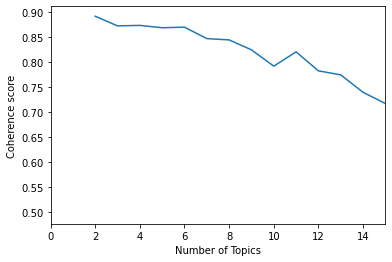

In [13]:
from tqdm import tqdm
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): # 응집도 계산
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values 

def find_optimal_number_of_topics(dictionary, corpus, processed_data): # 토픽갯수별 응집도 그래프
    limit = 50; #토픽 마지막갯수
    start = 2; #토픽 시작갯수
    step = 1; ### 1개씩 해서 돌려보기 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, 
                                                            texts=processed_data, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlim([0, 15]) 
    plt.xlabel("Number of Topics") 
    plt.ylabel("Coherence score")
#     plt.legend(("coherence_values"), loc='best') 
    plt.show() 


processed_data = [sent.strip().split(",") for sent in tqdm(open('review_tokenized0304_12점.csv', 'r', encoding='utf-8').readlines())]
dictionary = corpora.Dictionary(processed_data) 
dictionary.filter_extremes(no_below=10, no_above=0.05) # 출현빈도가 적거나 자주 등장하는 단어는 제거 
corpus = [dictionary.doc2bow(text) for text in processed_data]
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
    
# 최적의 토픽 수 찾기 
find_optimal_number_of_topics(dictionary, corpus, processed_data)

In [14]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

2023-03-04 17:38:30,713 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2023-03-04 17:38:31,264 : INFO : built Dictionary(21593 unique tokens: ['1번', 'kcu', '꿀강', '두번', '들었는데']...) from 5694 documents (total 153333 corpus positions)


In [26]:
import gensim
NUM_TOPICS = 6
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

2023-03-04 17:42:13,014 : INFO : using symmetric alpha at 0.16666666666666666
2023-03-04 17:42:13,016 : INFO : using symmetric eta at 0.16666666666666666
2023-03-04 17:42:13,021 : INFO : using serial LDA version on this node
2023-03-04 17:42:13,044 : INFO : running online (multi-pass) LDA training, 6 topics, 15 passes over the supplied corpus of 5694 documents, updating model once every 2000 documents, evaluating perplexity every 5694 documents, iterating 50x with a convergence threshold of 0.001000
2023-03-04 17:42:13,045 : INFO : PROGRESS: pass 0, at document #2000/5694
2023-03-04 17:42:14,740 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:42:14,754 : INFO : topic #5 (0.167): 0.010*"과제" + 0.009*"강의" + 0.008*"수업" + 0.007*"생각" + 0.006*"팀플" + 0.006*"시험" + 0.005*"별로" + 0.003*"내용" + 0.003*"교수님" + 0.003*"학점"
2023-03-04 17:42:14,756 : INFO : topic #2 (0.167): 0.031*"수업" + 0.020*"교수님" + 0.016*"강의" + 0.009*"과제" + 0.008*"시험" + 0.008*"학생" + 0.006*"팀플" 

2023-03-04 17:42:22,203 : INFO : topic #2 (0.167): 0.032*"수업" + 0.020*"교수님" + 0.011*"강의" + 0.009*"학생" + 0.009*"발표" + 0.008*"과제" + 0.008*"점수" + 0.007*"팀플" + 0.006*"시험" + 0.006*"별로"
2023-03-04 17:42:22,205 : INFO : topic #5 (0.167): 0.004*"조교" + 0.003*"공학" + 0.002*"종교" + 0.002*"증명" + 0.002*"회로이론" + 0.002*"반도체" + 0.002*"여자" + 0.002*"생각" + 0.002*"절레절레" + 0.002*"물리학"
2023-03-04 17:42:22,207 : INFO : topic diff=0.357924, rho=0.413555
2023-03-04 17:42:22,209 : INFO : PROGRESS: pass 2, at document #4000/5694
2023-03-04 17:42:23,125 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:42:23,138 : INFO : topic #3 (0.167): 0.024*"시험" + 0.019*"강의" + 0.014*"교수님" + 0.014*"수업" + 0.014*"과제" + 0.012*"문제" + 0.008*"내용" + 0.007*"학생" + 0.005*"정말" + 0.005*"이해"
2023-03-04 17:42:23,140 : INFO : topic #5 (0.167): 0.003*"조교" + 0.002*"기피" + 0.002*"공학" + 0.002*"여자" + 0.002*"반도체" + 0.002*"듣지말고" + 0.002*"증명" + 0.002*"남자" + 0.002*"듣지말라면" + 0.002*"잘만"
2023-03-04 17:42:23,142 : INF

2023-03-04 17:42:29,183 : INFO : topic #3 (0.167): 0.024*"시험" + 0.020*"강의" + 0.015*"과제" + 0.015*"수업" + 0.014*"교수님" + 0.012*"문제" + 0.008*"내용" + 0.006*"학생" + 0.005*"정말" + 0.005*"이해"
2023-03-04 17:42:29,185 : INFO : topic #1 (0.167): 0.036*"수업" + 0.022*"강의" + 0.015*"교수님" + 0.010*"듣지" + 0.009*"시험" + 0.008*"과제" + 0.008*"과목" + 0.008*"공부" + 0.007*"학점" + 0.007*"생각"
2023-03-04 17:42:29,187 : INFO : topic diff=0.188667, rho=0.356984
2023-03-04 17:42:30,156 : INFO : -8.703 per-word bound, 416.6 perplexity estimate based on a held-out corpus of 1694 documents with 39572 words
2023-03-04 17:42:30,158 : INFO : PROGRESS: pass 4, at document #5694/5694
2023-03-04 17:42:31,132 : INFO : merging changes from 1694 documents into a model of 5694 documents
2023-03-04 17:42:31,151 : INFO : topic #1 (0.167): 0.036*"수업" + 0.021*"강의" + 0.014*"교수님" + 0.010*"듣지" + 0.010*"과목" + 0.009*"시험" + 0.008*"공부" + 0.008*"과제" + 0.008*"학점" + 0.007*"생각"
2023-03-04 17:42:31,154 : INFO : topic #2 (0.167): 0.032*"수업" + 0.019*"교수님"

2023-03-04 17:42:36,803 : INFO : topic #4 (0.167): 0.021*"수업" + 0.019*"교수님" + 0.013*"과제" + 0.008*"시험" + 0.007*"강의" + 0.005*"점수" + 0.004*"생각" + 0.004*"별로" + 0.004*"설명" + 0.004*"영어"
2023-03-04 17:42:36,805 : INFO : topic #0 (0.167): 0.012*"실험" + 0.011*"제발" + 0.009*"채플" + 0.007*"도망가" + 0.005*"질문" + 0.005*"강의" + 0.005*"시험" + 0.005*"레포트" + 0.004*"기독교" + 0.004*"짜증나"
2023-03-04 17:42:36,806 : INFO : topic #3 (0.167): 0.024*"시험" + 0.019*"강의" + 0.016*"과제" + 0.015*"수업" + 0.013*"교수님" + 0.013*"문제" + 0.008*"내용" + 0.006*"학생" + 0.005*"공부" + 0.005*"이해"
2023-03-04 17:42:36,809 : INFO : topic diff=0.140710, rho=0.318675
2023-03-04 17:42:36,810 : INFO : PROGRESS: pass 7, at document #2000/5694
2023-03-04 17:42:37,448 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:42:37,461 : INFO : topic #1 (0.167): 0.036*"수업" + 0.022*"강의" + 0.014*"교수님" + 0.010*"듣지" + 0.009*"시험" + 0.009*"과목" + 0.008*"과제" + 0.008*"공부" + 0.007*"학점" + 0.007*"마세요"
2023-03-04 17:42:37,463 : INFO : to

2023-03-04 17:42:42,469 : INFO : topic #0 (0.167): 0.014*"제발" + 0.012*"도망가" + 0.011*"채플" + 0.008*"실험" + 0.005*"질문" + 0.005*"기독교" + 0.004*"강의" + 0.004*"레포트" + 0.003*"시험" + 0.003*"강사"
2023-03-04 17:42:42,471 : INFO : topic #3 (0.167): 0.025*"시험" + 0.022*"강의" + 0.016*"과제" + 0.015*"수업" + 0.014*"교수님" + 0.012*"문제" + 0.008*"내용" + 0.006*"학생" + 0.005*"이해" + 0.005*"설명"
2023-03-04 17:42:42,472 : INFO : topic #4 (0.167): 0.021*"수업" + 0.019*"교수님" + 0.013*"과제" + 0.007*"시험" + 0.006*"강의" + 0.005*"점수" + 0.005*"영어" + 0.004*"별로" + 0.004*"생각" + 0.004*"설명"
2023-03-04 17:42:42,474 : INFO : topic diff=0.120389, rho=0.278997
2023-03-04 17:42:42,476 : INFO : PROGRESS: pass 9, at document #4000/5694
2023-03-04 17:42:43,095 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:42:43,107 : INFO : topic #4 (0.167): 0.021*"수업" + 0.019*"교수님" + 0.013*"과제" + 0.007*"시험" + 0.006*"강의" + 0.005*"점수" + 0.005*"생각" + 0.004*"별로" + 0.004*"영어" + 0.004*"설명"
2023-03-04 17:42:43,108 : INFO : topi

2023-03-04 17:42:48,067 : INFO : topic #4 (0.167): 0.021*"수업" + 0.019*"교수님" + 0.012*"과제" + 0.007*"시험" + 0.006*"강의" + 0.005*"점수" + 0.004*"생각" + 0.004*"별로" + 0.004*"영어" + 0.004*"정치"
2023-03-04 17:42:48,069 : INFO : topic #5 (0.167): 0.005*"조교" + 0.003*"공학" + 0.002*"기피" + 0.002*"종교" + 0.002*"반도체" + 0.002*"증명" + 0.002*"듣지말고" + 0.002*"회로이론" + 0.002*"남자" + 0.002*"듣지말라면"
2023-03-04 17:42:48,071 : INFO : topic #1 (0.167): 0.036*"수업" + 0.023*"강의" + 0.015*"교수님" + 0.012*"듣지" + 0.008*"과목" + 0.008*"마세요" + 0.008*"시험" + 0.008*"학점" + 0.007*"공부" + 0.007*"과제"
2023-03-04 17:42:48,074 : INFO : topic diff=0.104764, rho=0.259526
2023-03-04 17:42:48,730 : INFO : -8.624 per-word bound, 394.5 perplexity estimate based on a held-out corpus of 1694 documents with 39572 words
2023-03-04 17:42:48,731 : INFO : PROGRESS: pass 11, at document #5694/5694
2023-03-04 17:42:49,181 : INFO : merging changes from 1694 documents into a model of 5694 documents
2023-03-04 17:42:49,194 : INFO : topic #1 (0.167): 0.036*"수업" + 0.

2023-03-04 17:42:54,222 : INFO : topic #5 (0.167): 0.007*"조교" + 0.004*"공학" + 0.003*"종교" + 0.003*"반도체" + 0.003*"회로이론" + 0.002*"증명" + 0.002*"물리학" + 0.002*"기피" + 0.002*"절레절레" + 0.002*"듣지말라면"
2023-03-04 17:42:54,224 : INFO : topic #1 (0.167): 0.036*"수업" + 0.021*"강의" + 0.014*"교수님" + 0.012*"듣지" + 0.010*"과목" + 0.008*"마세요" + 0.008*"학점" + 0.008*"시험" + 0.008*"공부" + 0.007*"과제"
2023-03-04 17:42:54,226 : INFO : topic #2 (0.167): 0.033*"수업" + 0.019*"교수님" + 0.012*"발표" + 0.010*"학생" + 0.008*"점수" + 0.007*"과제" + 0.007*"강의" + 0.007*"팀플" + 0.006*"성적" + 0.005*"생각"
2023-03-04 17:42:54,228 : INFO : topic #4 (0.167): 0.020*"수업" + 0.019*"교수님" + 0.011*"과제" + 0.006*"시험" + 0.005*"강의" + 0.005*"점수" + 0.004*"영어" + 0.004*"생각" + 0.004*"별로" + 0.004*"설명"
2023-03-04 17:42:54,231 : INFO : topic diff=0.098079, rho=0.243634
2023-03-04 17:42:54,232 : INFO : PROGRESS: pass 14, at document #2000/5694
2023-03-04 17:42:54,851 : INFO : merging changes from 2000 documents into a model of 5694 documents
2023-03-04 17:42:54,864 : INF

(0, '0.012*"실험" + 0.012*"제발" + 0.011*"채플" + 0.008*"도망가" + 0.005*"질문" + 0.005*"기독교" + 0.004*"짜증나" + 0.004*"레포트" + 0.003*"조교" + 0.002*"공연채플"')
(1, '0.036*"수업" + 0.021*"강의" + 0.014*"교수님" + 0.012*"듣지" + 0.010*"과목" + 0.008*"마세요" + 0.008*"학점" + 0.008*"공부" + 0.008*"시험" + 0.007*"과제"')
(2, '0.033*"수업" + 0.019*"교수님" + 0.013*"발표" + 0.010*"학생" + 0.008*"점수" + 0.007*"과제" + 0.007*"강의" + 0.007*"팀플" + 0.006*"성적" + 0.005*"생각"')
(3, '0.025*"시험" + 0.021*"강의" + 0.016*"과제" + 0.016*"수업" + 0.013*"교수님" + 0.013*"문제" + 0.008*"내용" + 0.006*"학생" + 0.005*"설명" + 0.005*"공부"')
(4, '0.020*"수업" + 0.019*"교수님" + 0.011*"과제" + 0.006*"시험" + 0.005*"점수" + 0.005*"강의" + 0.004*"영어" + 0.004*"생각" + 0.004*"별로" + 0.004*"설명"')
(5, '0.007*"조교" + 0.004*"공학" + 0.003*"종교" + 0.003*"반도체" + 0.003*"회로이론" + 0.002*"증명" + 0.002*"물리학" + 0.002*"기피" + 0.002*"절레절레" + 0.002*"듣지말라면"')


In [27]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\km022\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [28]:
pyLDAvis.save_html(vis, '토픽모델링 12점결과6개버전0304.html')

In [29]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [30]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,1.0,0.6048,"[(1, 0.6047523), (3, 0.3704398)]"
1,1,3.0,0.9507,"[(3, 0.95069605)]"
2,2,1.0,0.9871,"[(1, 0.9870544)]"
3,3,2.0,0.9665,"[(2, 0.96646863)]"
4,4,2.0,0.8376,"[(0, 0.14255066), (2, 0.83764064)]"
5,5,3.0,0.9066,"[(0, 0.018579464), (1, 0.018672703), (2, 0.018..."
6,6,1.0,0.6272,"[(0, 0.020218814), (1, 0.62720674), (2, 0.3455..."
7,7,2.0,0.5285,"[(0, 0.14231281), (2, 0.5284741), (3, 0.309088..."
8,8,1.0,0.7623,"[(0, 0.1627539), (1, 0.76228845), (2, 0.018693..."
9,9,2.0,0.9800,"[(2, 0.97997546)]"


In [31]:
topictable['가장 비중이 높은 토픽'] = topictable['가장 비중이 높은 토픽'] + 1
topictable.head(10)

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,2.0,0.6048,"[(1, 0.6047523), (3, 0.3704398)]"
1,1,4.0,0.9507,"[(3, 0.95069605)]"
2,2,2.0,0.9871,"[(1, 0.9870544)]"
3,3,3.0,0.9665,"[(2, 0.96646863)]"
4,4,3.0,0.8376,"[(0, 0.14255066), (2, 0.83764064)]"
5,5,4.0,0.9066,"[(0, 0.018579464), (1, 0.018672703), (2, 0.018..."
6,6,2.0,0.6272,"[(0, 0.020218814), (1, 0.62720674), (2, 0.3455..."
7,7,3.0,0.5285,"[(0, 0.14231281), (2, 0.5284741), (3, 0.309088..."
8,8,2.0,0.7623,"[(0, 0.1627539), (1, 0.76228845), (2, 0.018693..."
9,9,3.0,0.9800,"[(2, 0.97997546)]"


In [32]:
# 토픽 번호를 첨부함으로서 어떤 주제인지 찾을 수 있게 분류
df['토픽 번호'] = topictable['가장 비중이 높은 토픽']
df['토픽 비중'] = topictable['가장 높은 토픽의 비중']
df.head()

,개정형태소,토픽 번호,토픽 비중,원본리뷰
0,"꿀강, 이라, 해서, 들었는데, 꿀, 강인, 지, 모를, 시험, 1번, 에, 퀴즈,...",2.0,0.6048,꿀강이라 해서 들었는데 꿀강인지 모를 시험 1번에 퀴즈 두번인데 퀴즈는 어디서 배운...
1,"강의, 가, 굉장히, 오래된, 것, 같습니다, 내용, 도, 너무, 방대하고, 퀴즈,...",4.0,0.9507,강의가 굉장히 오래된 것 같습니다 내용도 너무 방대하고 퀴즈도 어디서 내는지 모르겠...
2,"일단, 학점, 이, 부족해서, 교양과목, 을, 찾는다고, 하면, 이, 과목, 은, ...",2.0,0.9871,일단 학점이 부족해서 교양과목을 찾는다고 하면 이 과목은 최대한 피하는 게 좋다 1...
3,"점수, 잘, 주고, 수업, 분위기, 좋고, 내용, 재밌고, 다, 좋은데, 교수님, ...",3.0,0.9665,점수 잘 주고 수업 분위기 좋고 내용 재밌고 다 좋은데 교수님이 여학생들한테 불필요...
4,"저, 는, 교수님, 이, 개인적, 으로, 수업시간, 이나, 쉬는, 시간, 에, 말,...",3.0,0.8376,저는 교수님이 개인적으로 수업 시간이나 쉬는 시간에 말을 걸어주실 때 되게 기분나쁜...


In [33]:
data = pd.read_csv('1,2점리뷰.csv')
data.head()

,강의명,학점,강좌유형,패논패여부,이수학년,전공여부,학과,교수명,리뷰,작성시점,평가별점수,공감수,캠퍼스,강의명길이,리뷰길이,리뷰_형태소_tuple,리뷰_형태소_list,리뷰_형태소_only_N,개정형태소
0,기업가정신과창업 KCU,3,이론,x,전학년,교양,교양,김한수,꿀강이라 해서 들었는데 꿀강인지 모를 시험 1번에 퀴즈 두번인데 퀴즈는 어디서 배운...,22년 2학기 수강자,2,0,인문,13,120,"[('꿀강', 'Noun'), ('이라', 'Josa'), ('해서', 'Verb'...","['꿀강', '이라', '해서', '들었는데', '꿀', '강인', '지', '모를...","['꿀강', '꿀', '강인', '시험', '번', '퀴즈', '번', '퀴즈', ...","꿀강, 이라, 해서, 들었는데, 꿀, 강인, 지, 모를, 시험, 1번, 에, 퀴즈,..."
1,기업가정신과창업 KCU,3,이론,x,전학년,교양,교양,김한수,강의가 굉장히 오래된 것 같습니다 내용도 너무 방대하고 퀴즈도 어디서 내는지 모르겠...,22년 2학기 수강자,2,0,인문,13,94,"[('강의', 'Noun'), ('가', 'Josa'), ('굉장히', 'Adjec...","['강의', '가', '굉장히', '오래된', '것', '같습니다', '내용', '...","['강의', '것', '내용', '퀴즈', '꿀', '시간', '제약', '수', ...","강의, 가, 굉장히, 오래된, 것, 같습니다, 내용, 도, 너무, 방대하고, 퀴즈,..."
2,교양골프,2,이론,x,전학년,교양,교양,조원득,일단 학점이 부족해서 교양과목을 찾는다고 하면 이 과목은 최대한 피하는 게 좋다 1...,16년 1학기 수강자,2,1,인문,4,296,"[('일단', 'Noun'), ('학점', 'Noun'), ('이', 'Josa')...","['일단', '학점', '이', '부족해서', '교양과목', '을', '찾는다고',...","['일단', '학점', '교양과목', '이', '과목', '최대한', '피하', '...","일단, 학점, 이, 부족해서, 교양과목, 을, 찾는다고, 하면, 이, 과목, 은, ..."
3,응급처치법,3,이론,x,전학년,교양,교양,함주호,점수 잘 주고 수업 분위기 좋고 내용 재밌고 다 좋은데 교수님이 여학생들한테 불필요...,22년 1학기 수강자,1,5,인문,5,102,"[('점수', 'Noun'), ('잘', 'Verb'), ('주고', 'Verb')...","['점수', '잘', '주고', '수업', '분위기', '좋고', '내용', '재밌...","['점수', '수업', '분위기', '내용', '교수', '여학생', '신체', '...","점수, 잘, 주고, 수업, 분위기, 좋고, 내용, 재밌고, 다, 좋은데, 교수님, ..."
4,응급처치법,3,이론,x,전학년,교양,교양,함주호,저는 교수님이 개인적으로 수업 시간이나 쉬는 시간에 말을 걸어주실 때 되게 기분나쁜...,19년 2학기 수강자,1,1,인문,5,169,"[('저', 'Noun'), ('는', 'Josa'), ('교수', 'Noun'),...","['저', '는', '교수', '님', '이', '개인', '적', '으로', '수...","['저', '교수', '개인', '수업', '시간', '시간', '말', '때', ...","저, 는, 교수님, 이, 개인적, 으로, 수업시간, 이나, 쉬는, 시간, 에, 말,..."


In [34]:
df['원본리뷰'] = data['리뷰']
df.head()

,개정형태소,토픽 번호,토픽 비중,원본리뷰
0,"꿀강, 이라, 해서, 들었는데, 꿀, 강인, 지, 모를, 시험, 1번, 에, 퀴즈,...",2.0,0.6048,꿀강이라 해서 들었는데 꿀강인지 모를 시험 1번에 퀴즈 두번인데 퀴즈는 어디서 배운...
1,"강의, 가, 굉장히, 오래된, 것, 같습니다, 내용, 도, 너무, 방대하고, 퀴즈,...",4.0,0.9507,강의가 굉장히 오래된 것 같습니다 내용도 너무 방대하고 퀴즈도 어디서 내는지 모르겠...
2,"일단, 학점, 이, 부족해서, 교양과목, 을, 찾는다고, 하면, 이, 과목, 은, ...",2.0,0.9871,일단 학점이 부족해서 교양과목을 찾는다고 하면 이 과목은 최대한 피하는 게 좋다 1...
3,"점수, 잘, 주고, 수업, 분위기, 좋고, 내용, 재밌고, 다, 좋은데, 교수님, ...",3.0,0.9665,점수 잘 주고 수업 분위기 좋고 내용 재밌고 다 좋은데 교수님이 여학생들한테 불필요...
4,"저, 는, 교수님, 이, 개인적, 으로, 수업시간, 이나, 쉬는, 시간, 에, 말,...",3.0,0.8376,저는 교수님이 개인적으로 수업 시간이나 쉬는 시간에 말을 걸어주실 때 되게 기분나쁜...


In [35]:
df.to_csv('6개토픽분류결과0304_12점_.csv', encoding='utf-8-sig', index=False)

In [36]:
topics

[(0,
  '0.012*"실험" + 0.012*"제발" + 0.011*"채플" + 0.008*"도망가" + 0.005*"질문" + 0.005*"기독교" + 0.004*"짜증나" + 0.004*"레포트" + 0.003*"조교" + 0.002*"공연채플"'),
 (1,
  '0.036*"수업" + 0.021*"강의" + 0.014*"교수님" + 0.012*"듣지" + 0.010*"과목" + 0.008*"마세요" + 0.008*"학점" + 0.008*"공부" + 0.008*"시험" + 0.007*"과제"'),
 (2,
  '0.033*"수업" + 0.019*"교수님" + 0.013*"발표" + 0.010*"학생" + 0.008*"점수" + 0.007*"과제" + 0.007*"강의" + 0.007*"팀플" + 0.006*"성적" + 0.005*"생각"'),
 (3,
  '0.025*"시험" + 0.021*"강의" + 0.016*"과제" + 0.016*"수업" + 0.013*"교수님" + 0.013*"문제" + 0.008*"내용" + 0.006*"학생" + 0.005*"설명" + 0.005*"공부"'),
 (4,
  '0.020*"수업" + 0.019*"교수님" + 0.011*"과제" + 0.006*"시험" + 0.005*"점수" + 0.005*"강의" + 0.004*"영어" + 0.004*"생각" + 0.004*"별로" + 0.004*"설명"'),
 (5,
  '0.007*"조교" + 0.004*"공학" + 0.003*"종교" + 0.003*"반도체" + 0.003*"회로이론" + 0.002*"증명" + 0.002*"물리학" + 0.002*"기피" + 0.002*"절레절레" + 0.002*"듣지말라면"')]